In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["figure.figsize"]=(10,5)

In [5]:
plt.rcParams["figure.dpi"]=500

In [6]:
df=pd.read_csv("data_clean.csv")

In [7]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [8]:
df["Month"].replace("May",5, inplace=True)

In [9]:
df["Month"].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [10]:
df["Month"]=df["Month"].astype(int)

In [11]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month           int32
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [12]:
df["Temp C"].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [13]:
df["Temp C"]=pd.to_numeric(df["Temp C"],errors="coerce")

In [14]:
df["Temp C"].unique()

array([67., 72., 74., 62., 56., 66., 65., 59., 61., 69., nan, 68., 58.,
       64., 57., 73., 81., 79., 76., 78., 84., 85., 82., 87., 90., 93.,
       92., 80., 77., 75., 83., 88., 89., 91., 86., 97., 94., 96., 71.,
       63., 70.])

In [15]:
df.drop(columns=["Year","Temp","Unnamed: 0"],inplace=True)

In [16]:
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Weather
0,41.0,190.0,7.4,67.0,5,1,S
1,36.0,118.0,8.0,72.0,5,2,C
2,12.0,149.0,12.6,74.0,5,3,PS
3,18.0,313.0,11.5,62.0,5,4,S
4,NaN,NaN,14.3,56.0,5,5,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5,1,C
154,30.0,193.0,6.9,70.0,9,26,PS
155,NaN,145.0,13.2,77.0,9,27,S
156,14.0,191.0,14.3,75.0,9,28,S


In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [18]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.rename(columns={"Temp C":"Temperature","Solar.R":"Solar"},inplace=True)

In [22]:
df

,Ozone,Solar,Wind,Temperature,Month,Day,Weather
0,41.0,190.0,7.4,67.0,5,1,S
1,36.0,118.0,8.0,72.0,5,2,C
2,12.0,149.0,12.6,74.0,5,3,PS
3,18.0,313.0,11.5,62.0,5,4,S
4,NaN,NaN,14.3,56.0,5,5,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9,30,S
153,41.0,190.0,7.4,67.0,5,1,C
154,30.0,193.0,6.9,70.0,9,26,PS
155,NaN,145.0,13.2,77.0,9,27,S


In [23]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Temperature     1
Month           0
Day             0
Weather         3
dtype: int64

In [24]:
sns.heatmap(df.isna())

<Axes: >

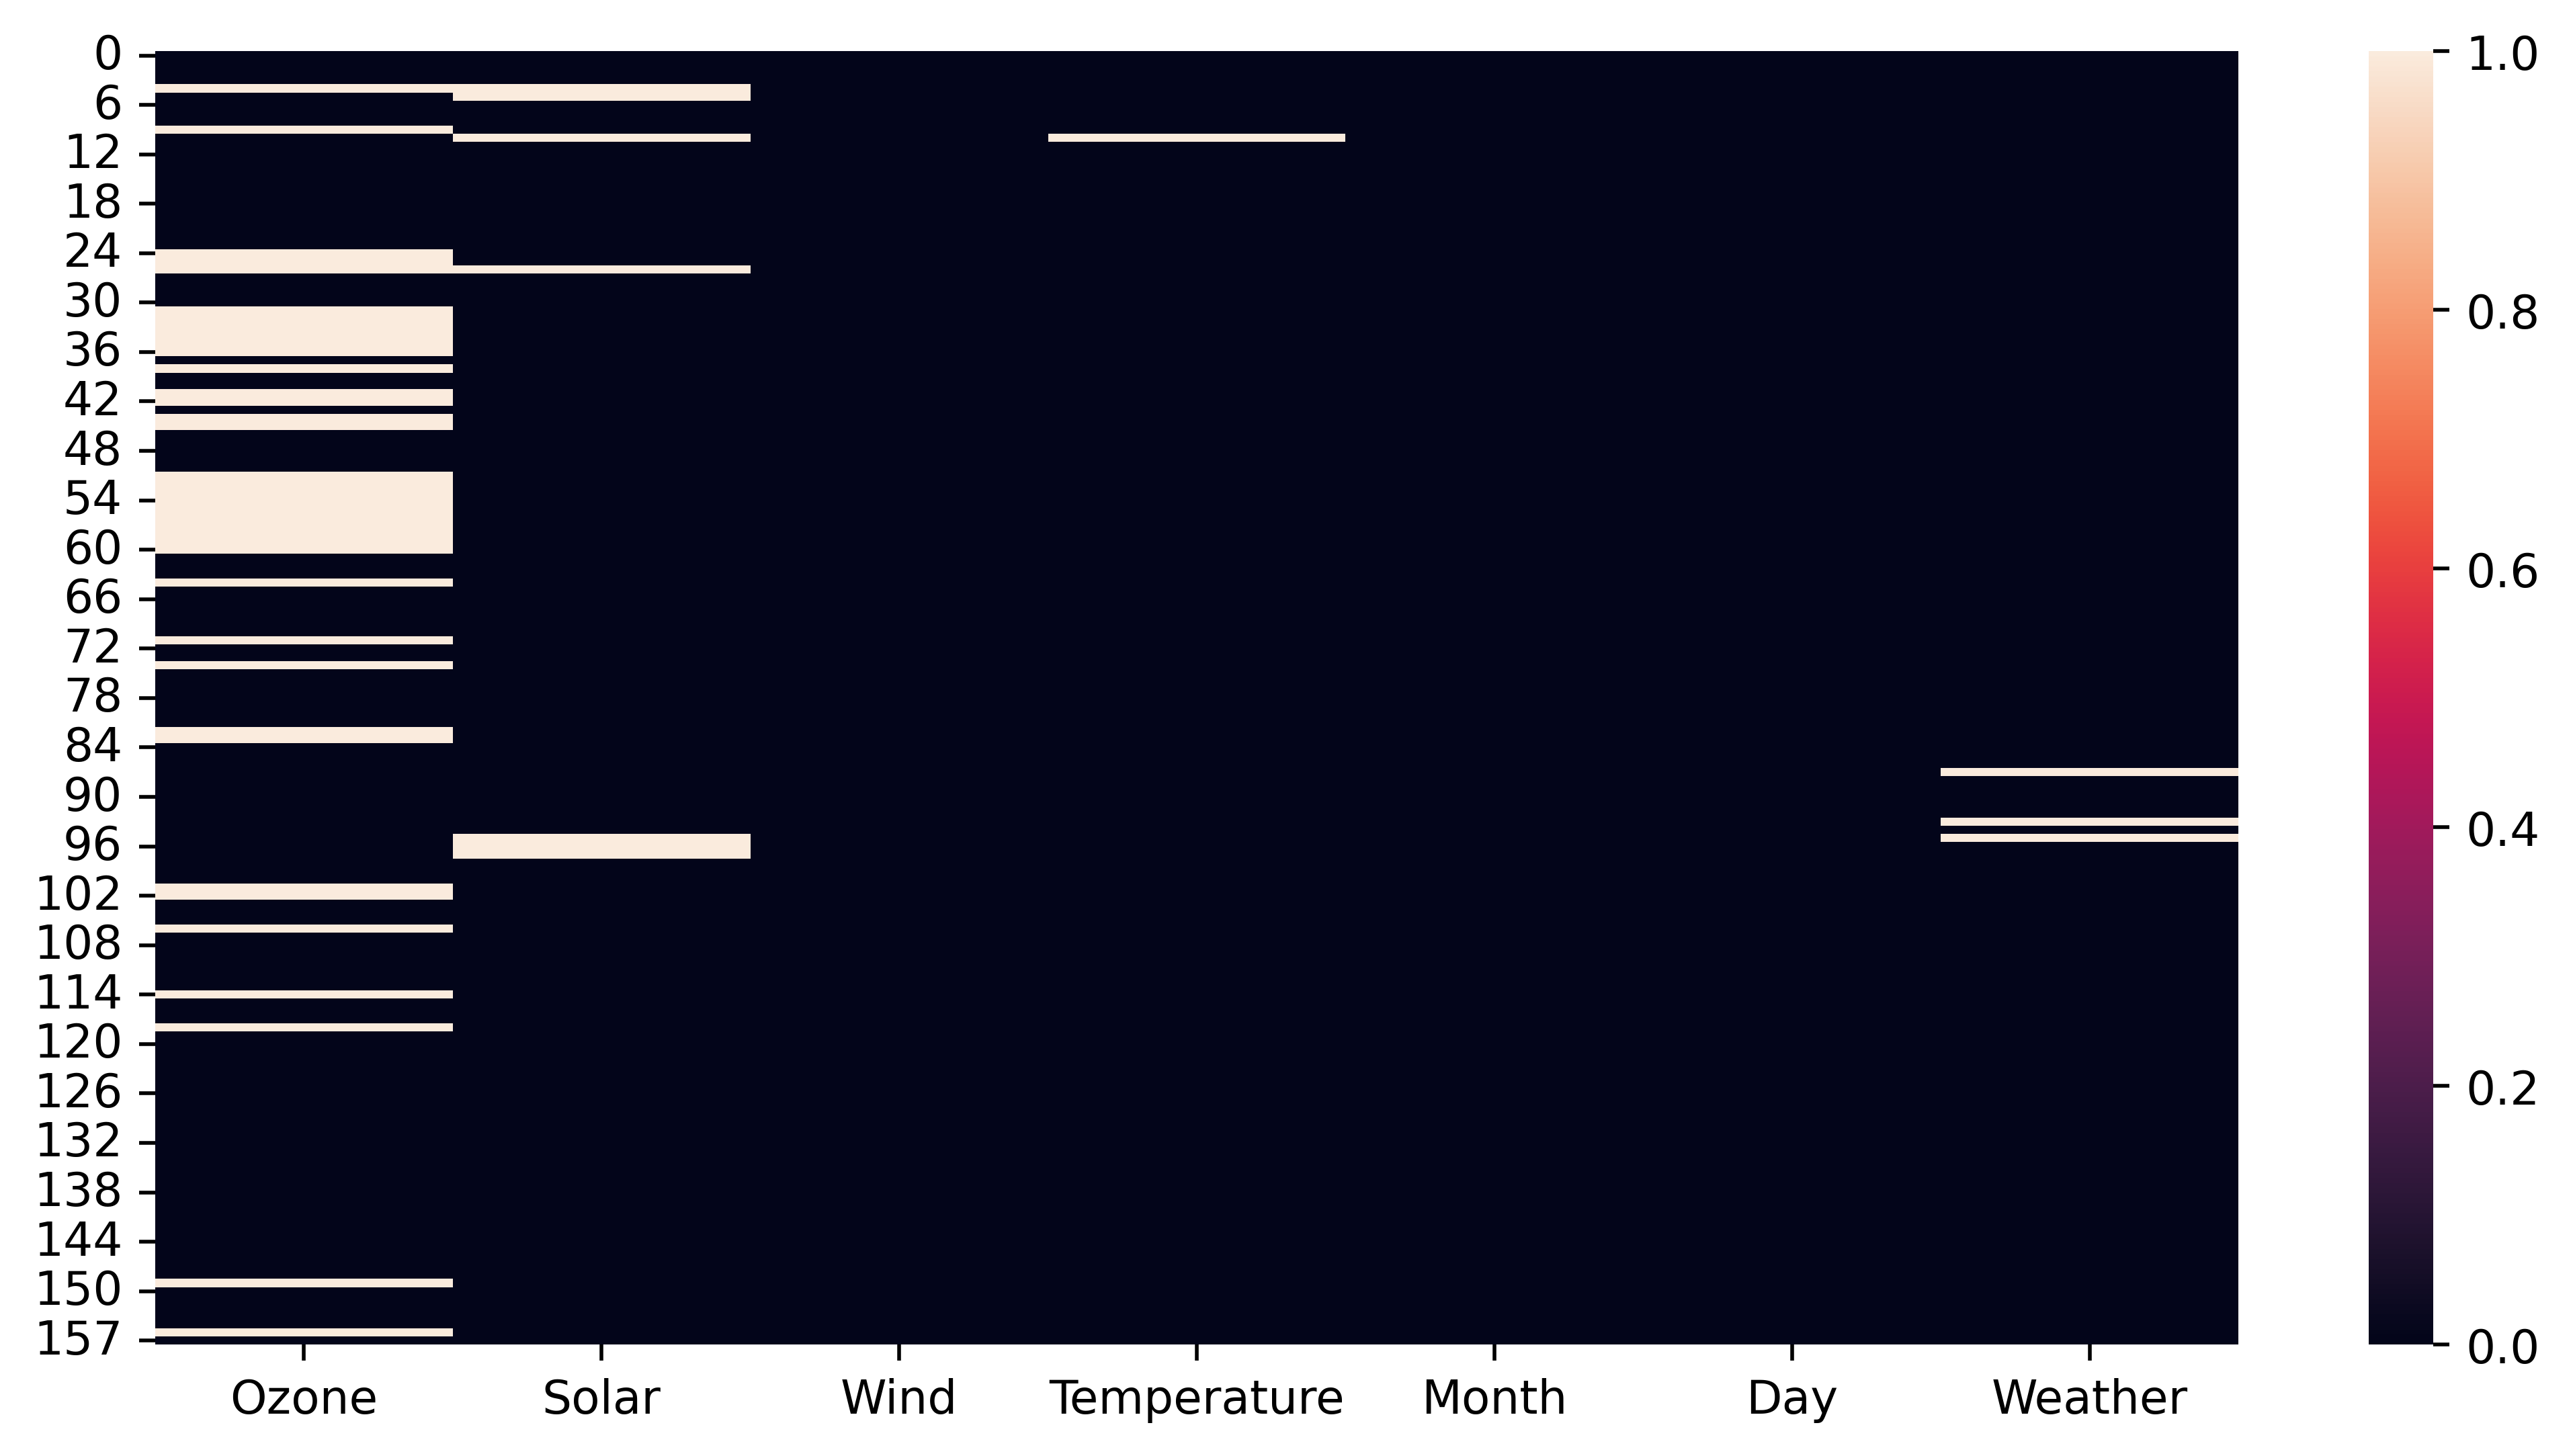

In [25]:
plt.show()

In [26]:
for i in df.isna().sum():
    print(i/len(df)*100)

24.203821656050955
4.45859872611465
0.0
0.6369426751592357
0.0
0.0
1.910828025477707


In [27]:
df.hist()
plt.tight_layout()

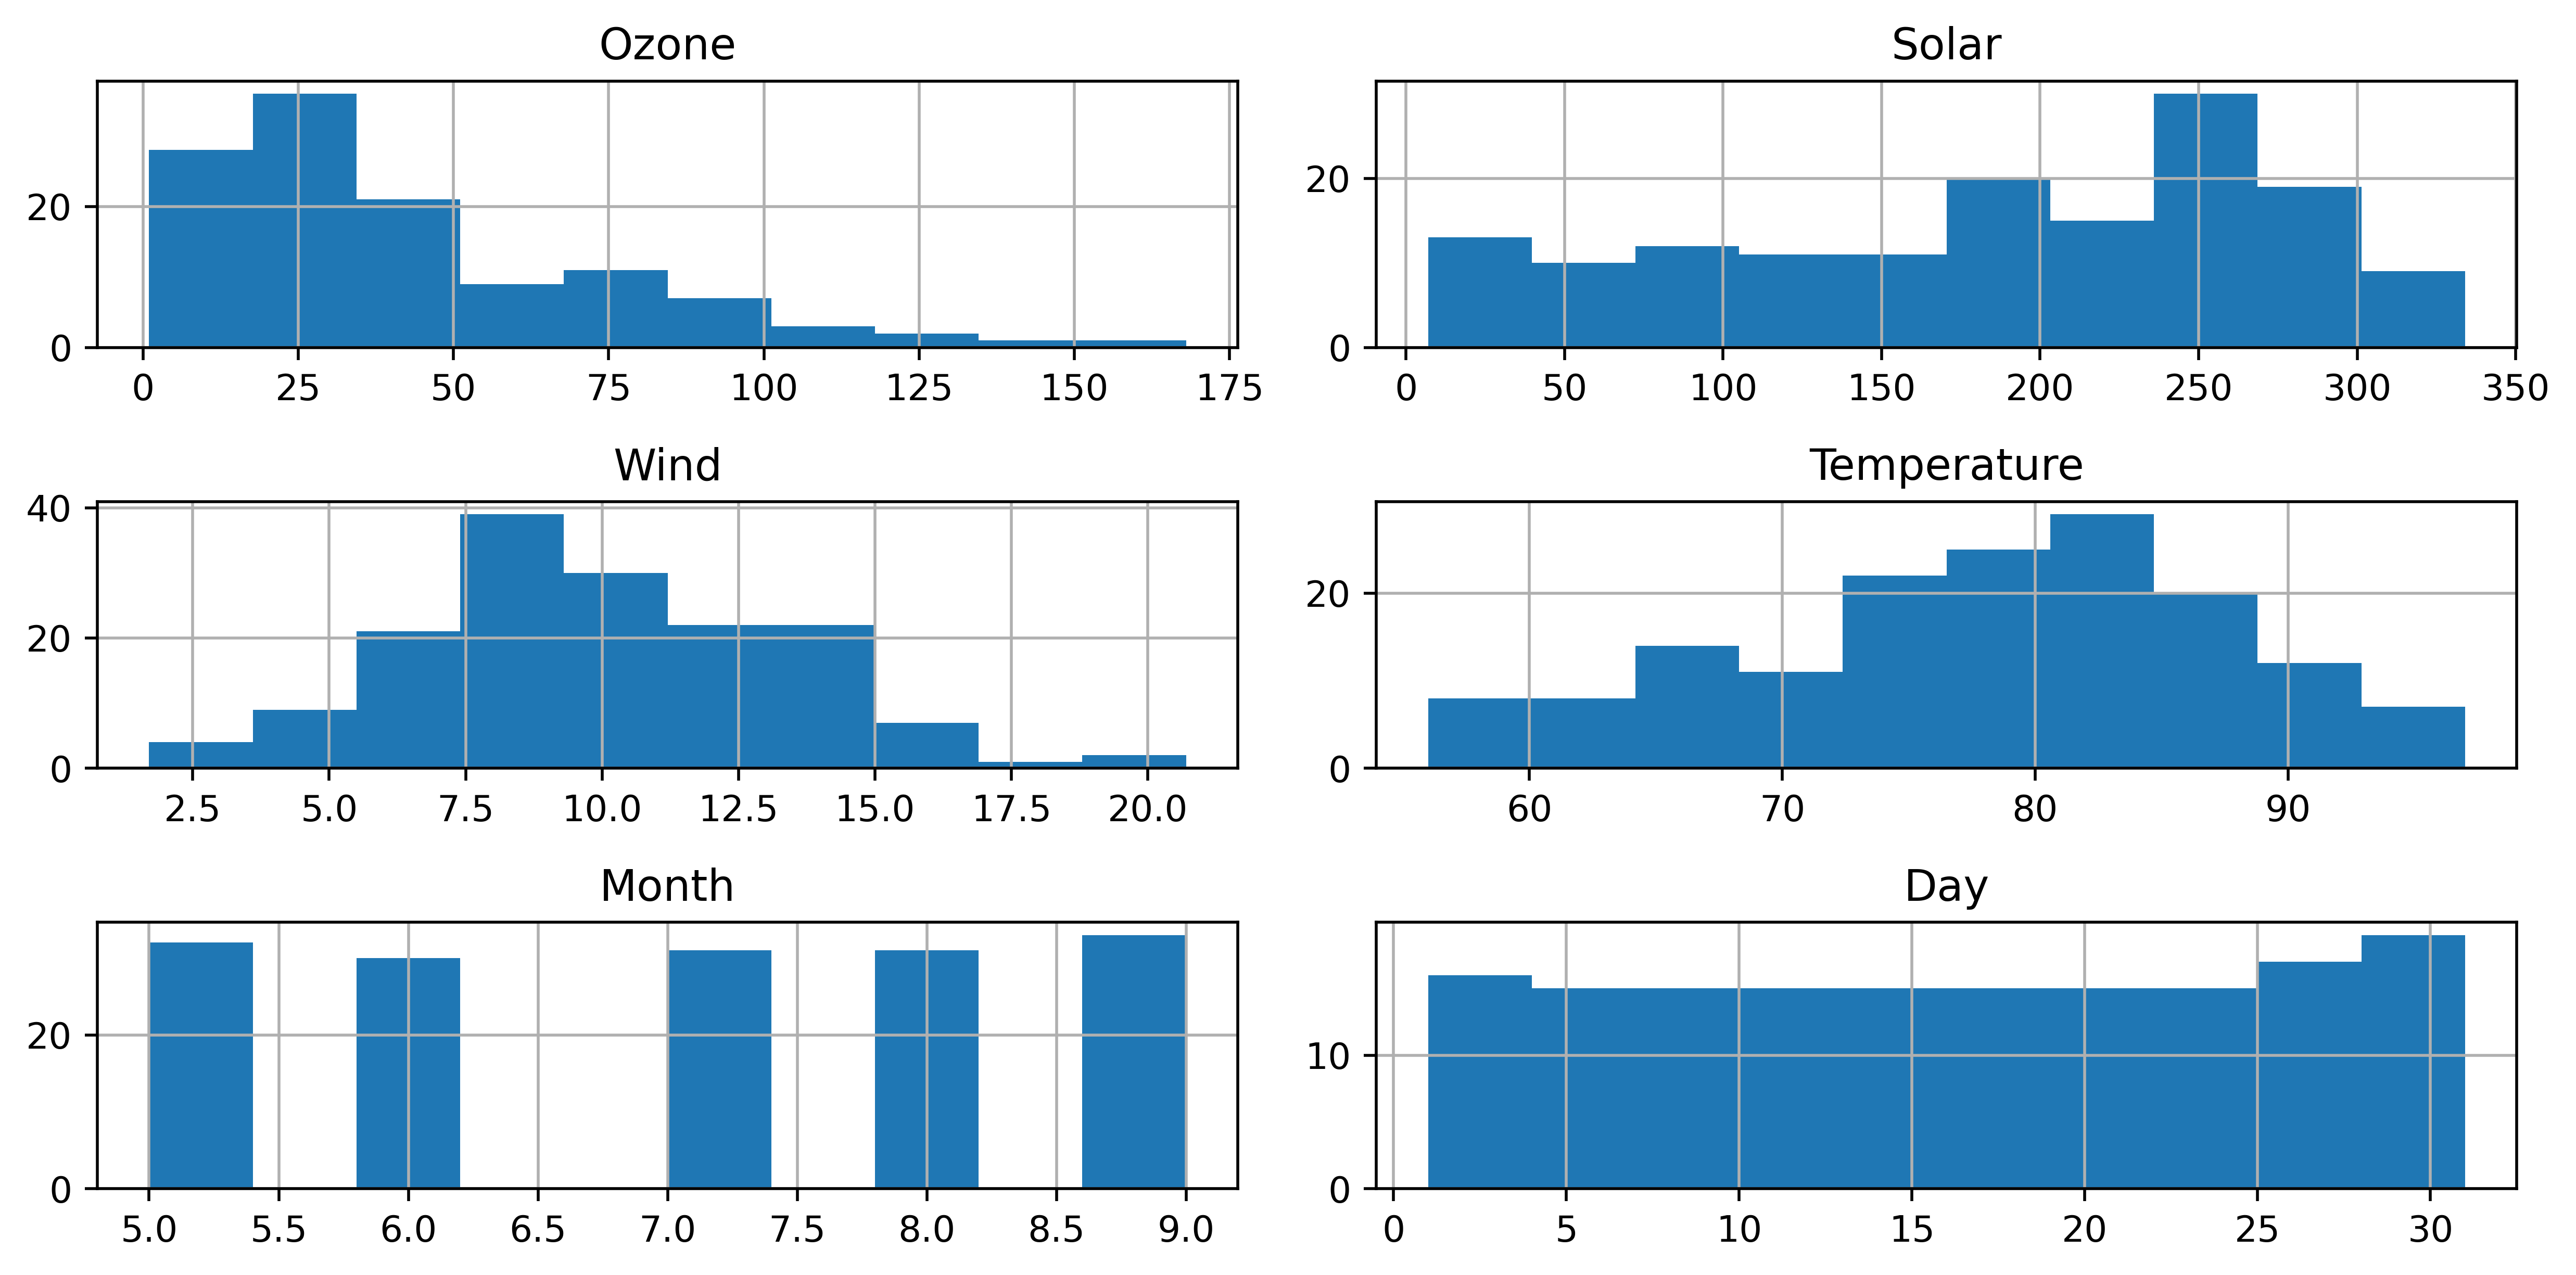

In [28]:
plt.show()

In [29]:
df["Ozone"].fillna(df["Ozone"].mean(),inplace=True)

In [30]:
df.isna().sum()

Ozone          0
Solar          7
Wind           0
Temperature    1
Month          0
Day            0
Weather        3
dtype: int64

In [31]:
df["Solar"].fillna(df["Solar"].mean(),inplace=True)

In [32]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Temperature    1
Month          0
Day            0
Weather        3
dtype: int64

In [33]:
df["Temperature"].fillna(df["Temperature"].mean(),inplace=True)

In [34]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Temperature    0
Month          0
Day            0
Weather        3
dtype: int64

In [35]:
df["Weather"].fillna(df["Weather"].mode()[0],inplace=True)

In [36]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Temperature    0
Month          0
Day            0
Weather        0
dtype: int64

In [37]:
sns.heatmap(df.isna())

<Axes: >

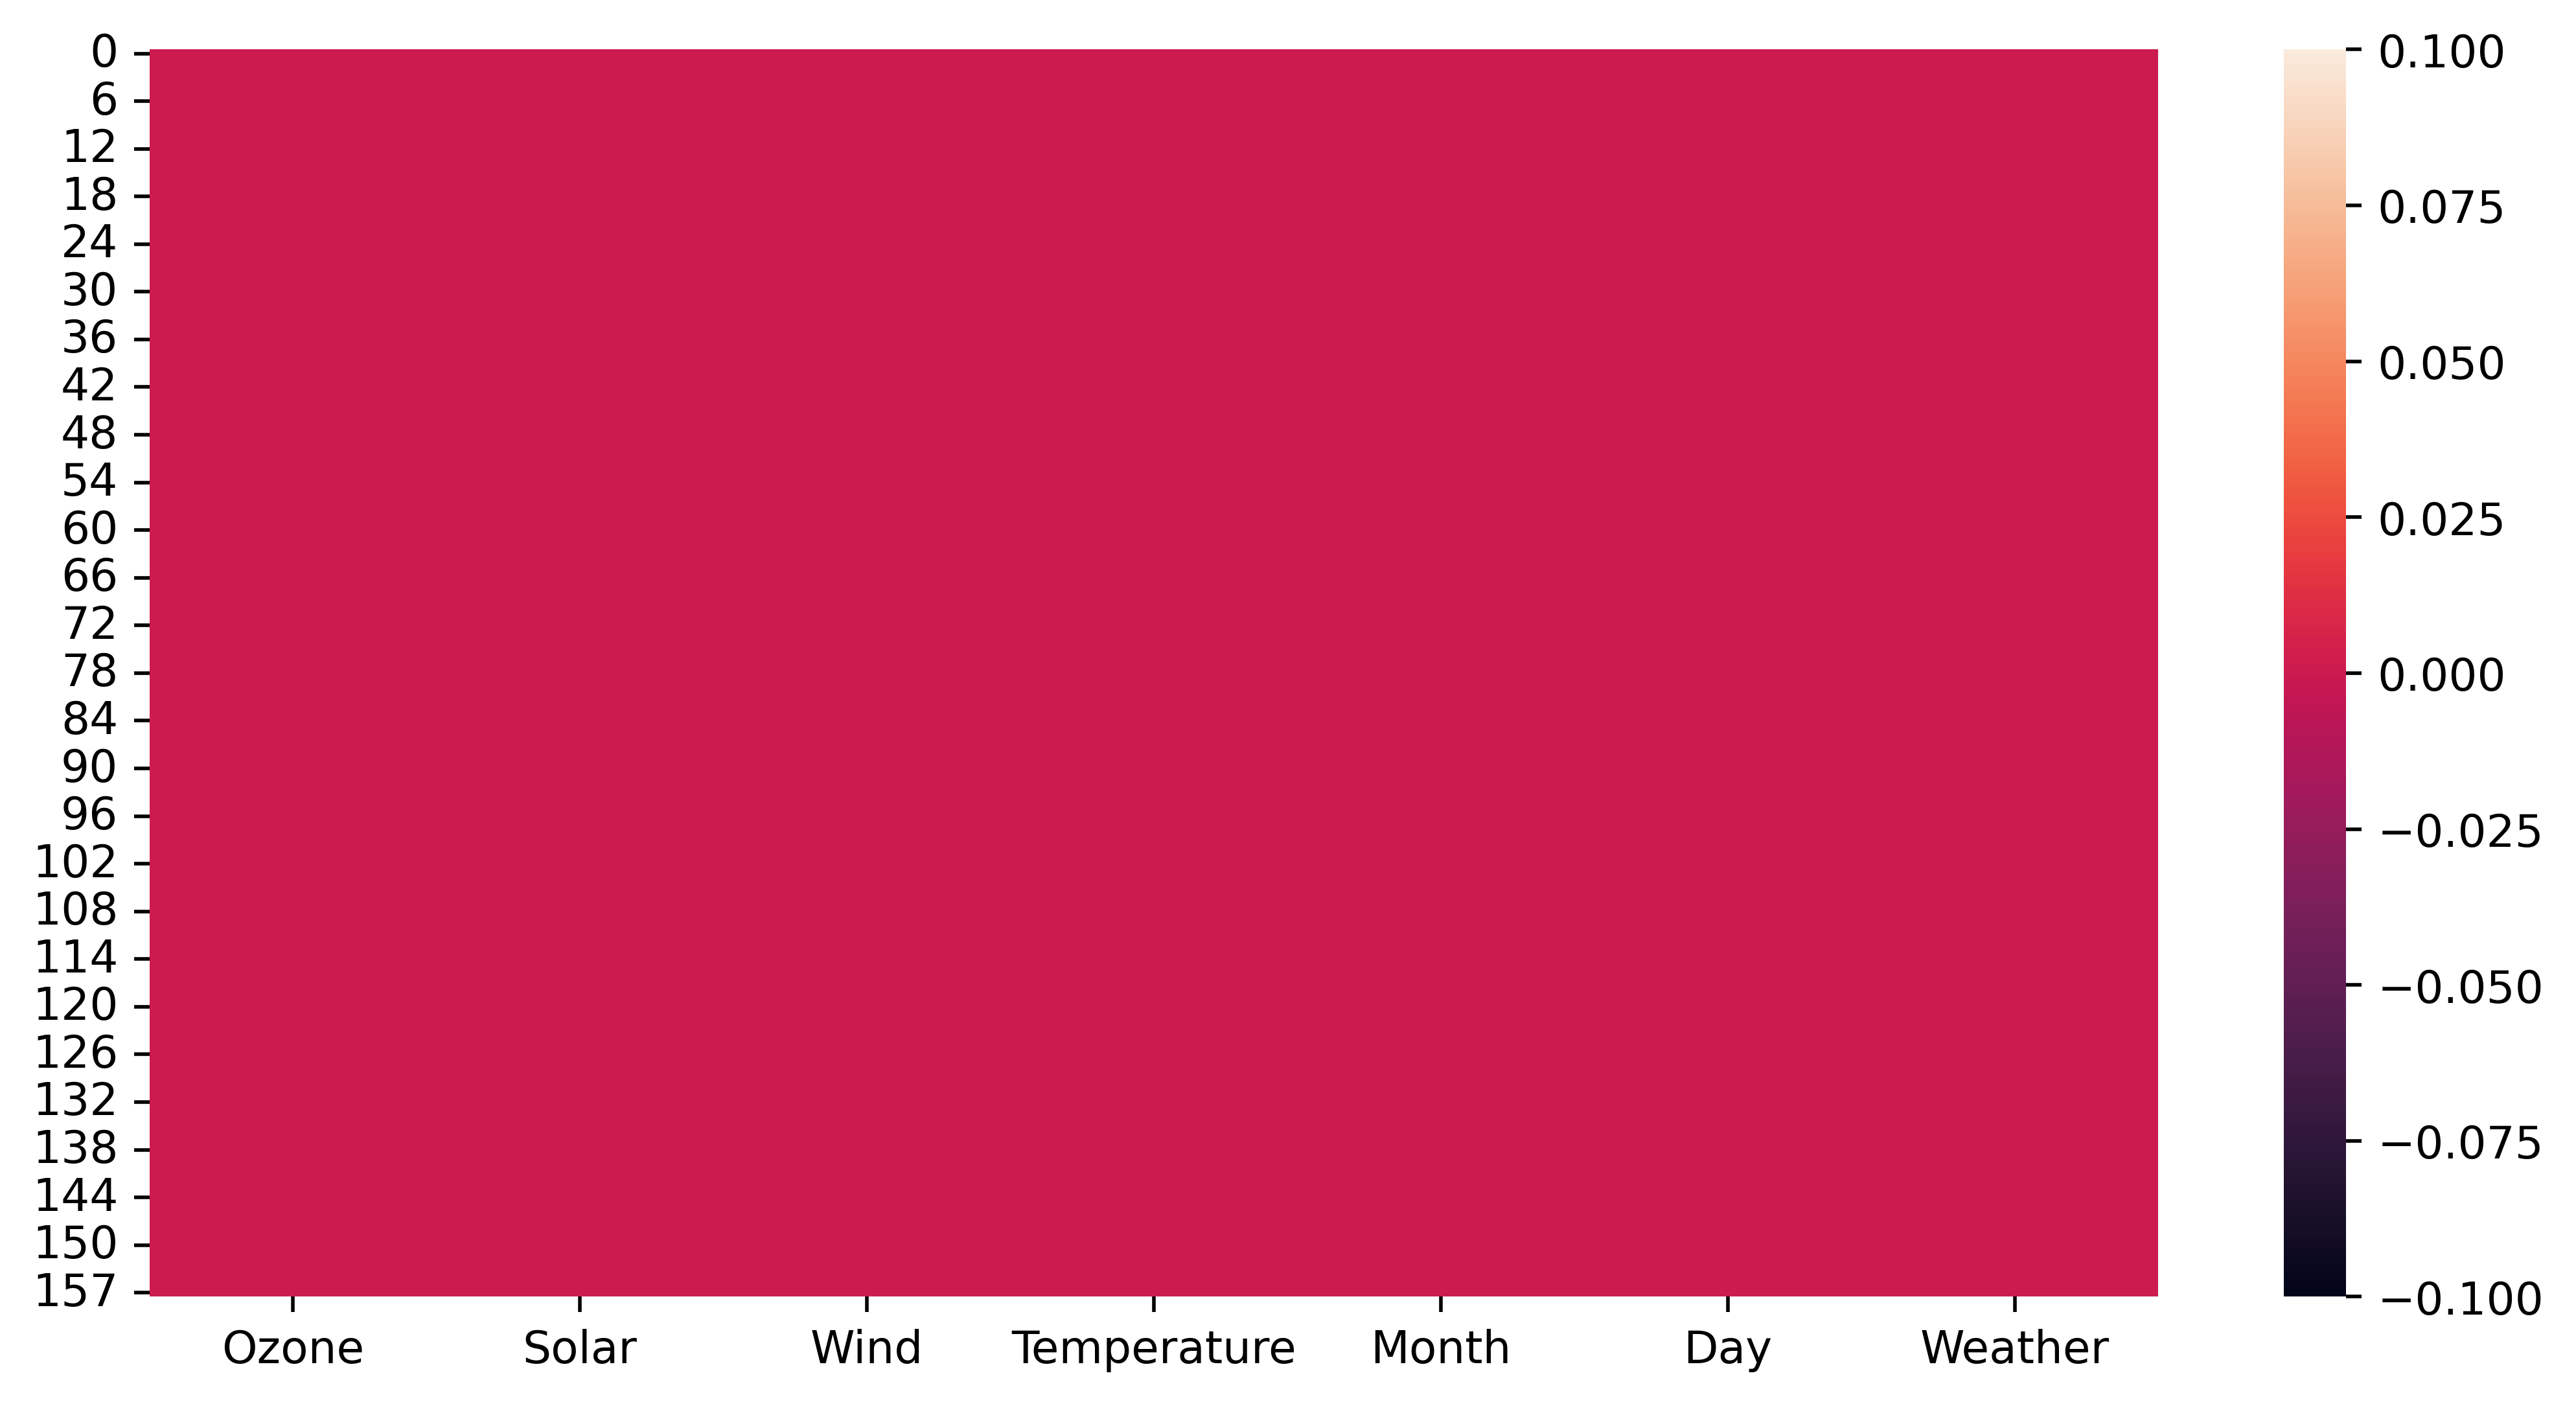

In [38]:
plt.show()

### Outlier Detection

In [39]:
def outlier_detection(data,colname):
    q1=data[colname].quantile(0.25)
    q3=data[colname].quantile(0.75)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    return lower,upper

In [40]:
outlier_detection(df,"Ozone")

(-15.0, 81.0)

In [41]:
df[df["Ozone"]>81.0]

,Ozone,Solar,Wind,Temperature,Month,Day,Weather
29,115.0,223.0,5.7,79.0,5,30,C
61,135.0,269.0,4.1,84.0,7,1,S
68,97.0,267.0,6.3,92.0,7,8,PS
69,97.0,272.0,5.7,92.0,7,9,C
70,85.0,175.0,7.4,89.0,7,10,PS
85,108.0,223.0,8.0,85.0,7,25,PS
88,82.0,213.0,7.4,88.0,7,28,S
98,122.0,255.0,4.0,89.0,8,7,C
99,89.0,229.0,10.3,90.0,8,8,PS
100,110.0,207.0,8.0,90.0,8,9,C


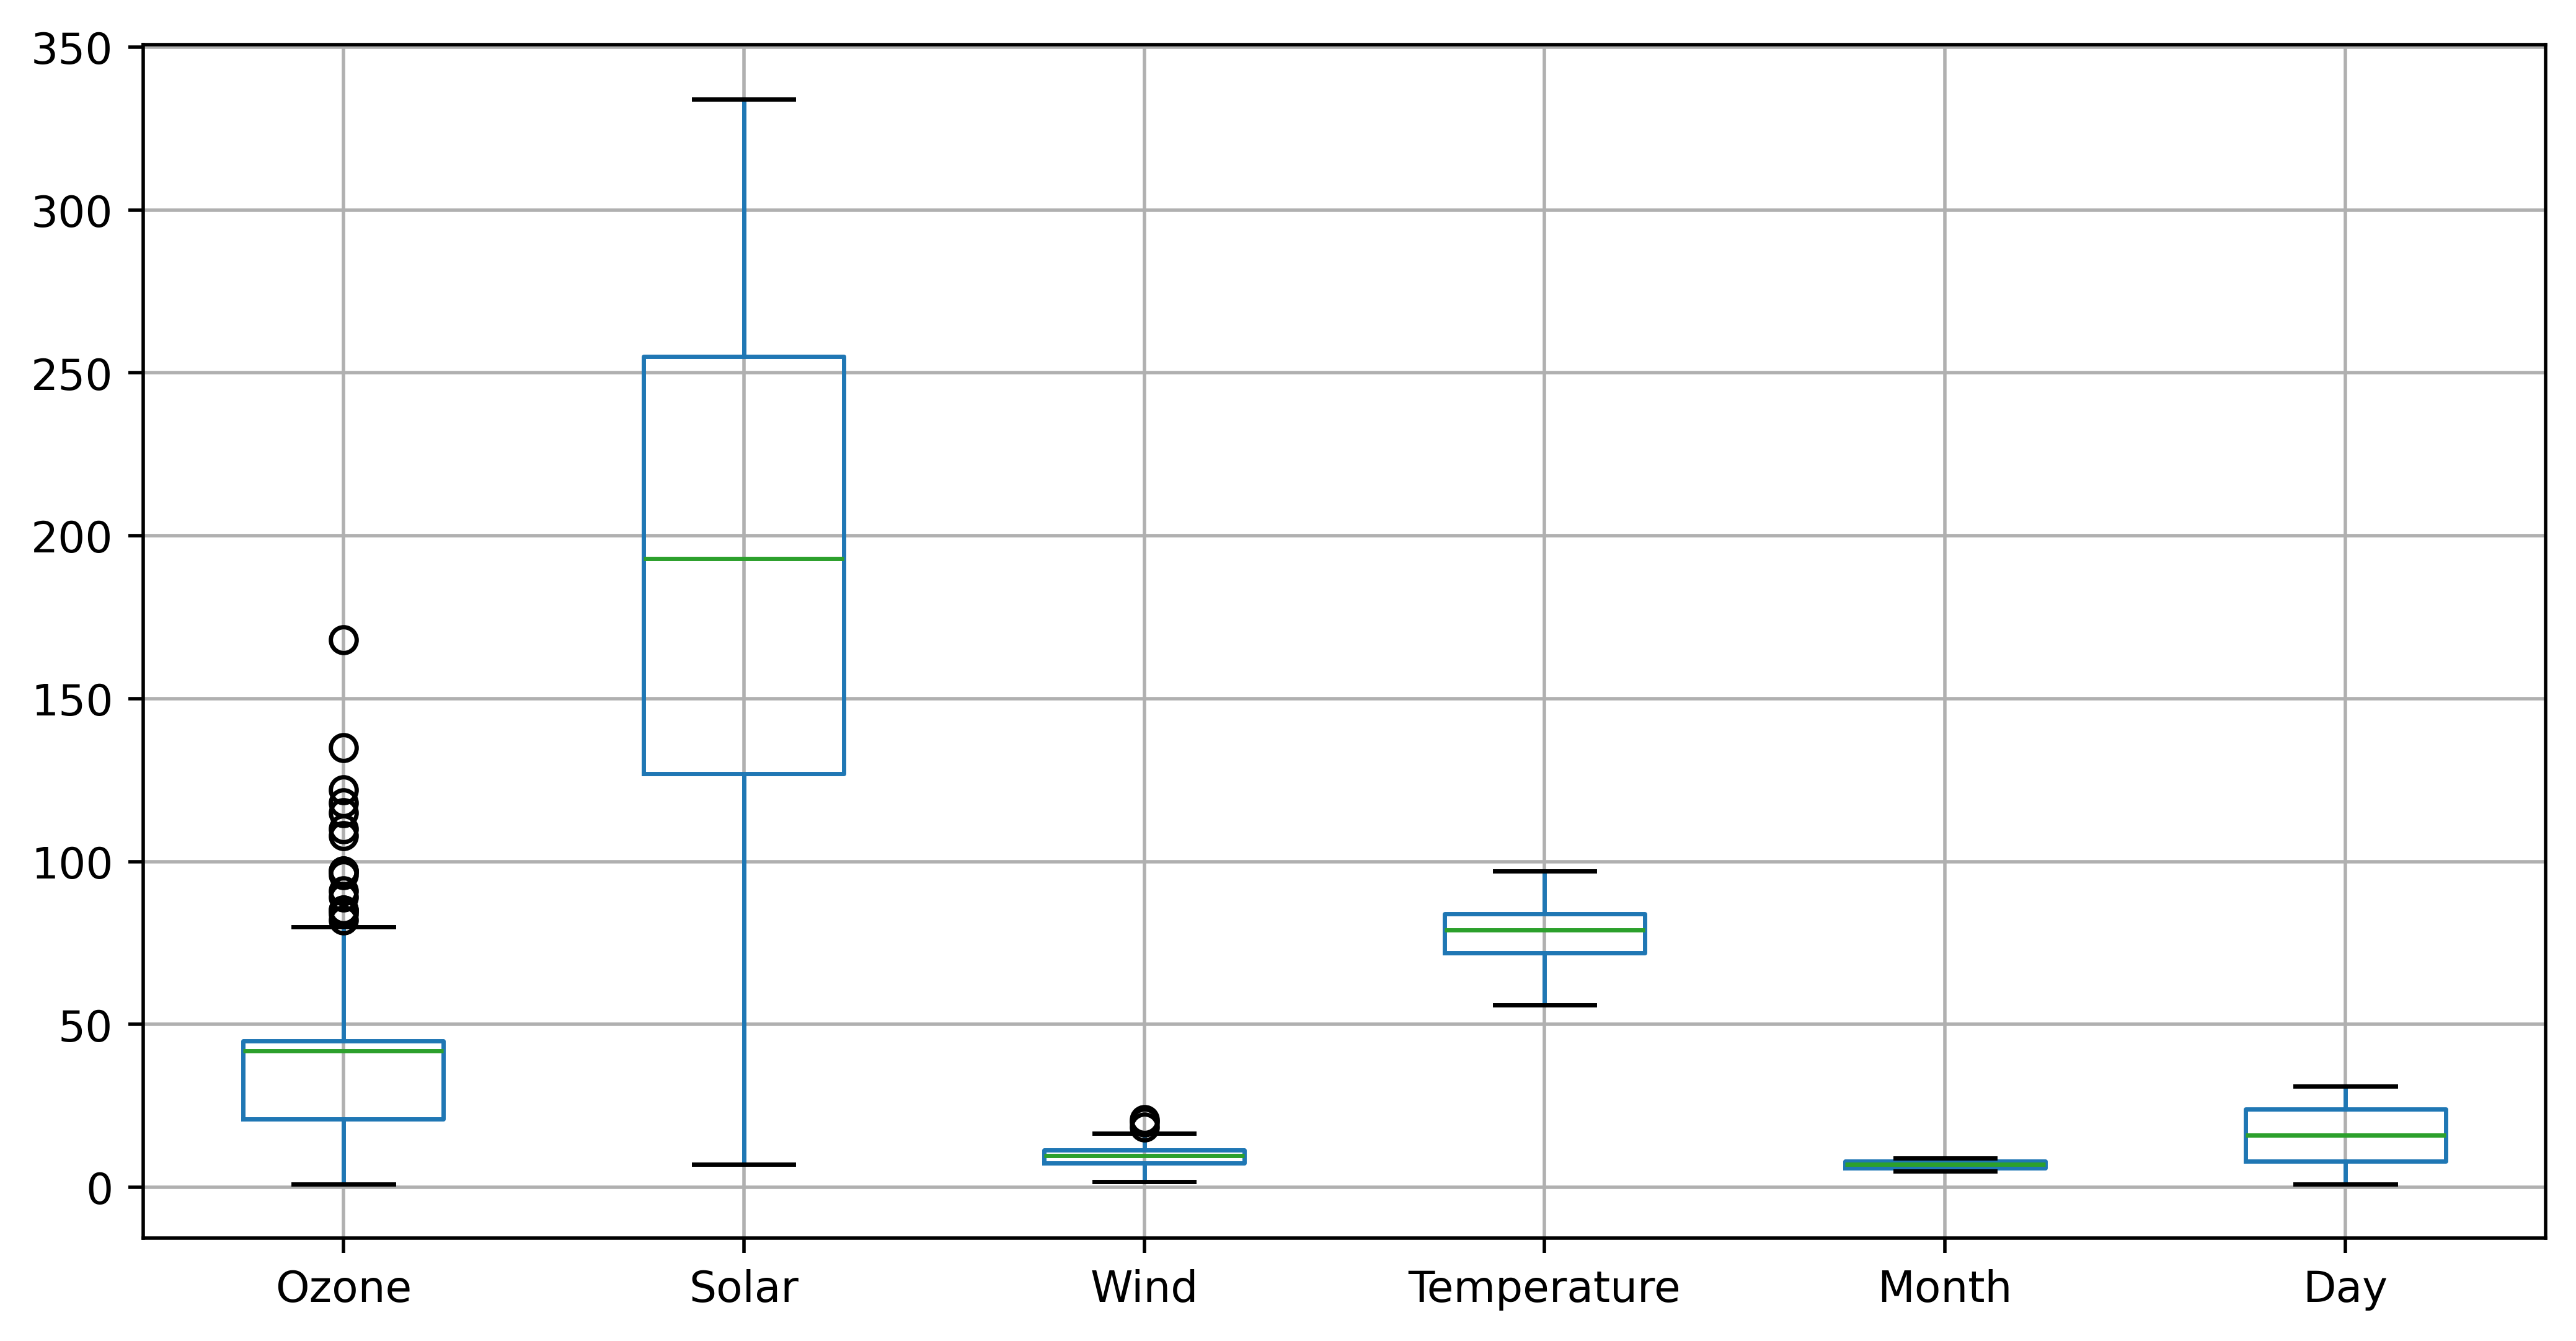

In [42]:
df.boxplot()
plt.show()

In [43]:
df.loc[df["Ozone"]>81.0,"Ozone"]=81.0

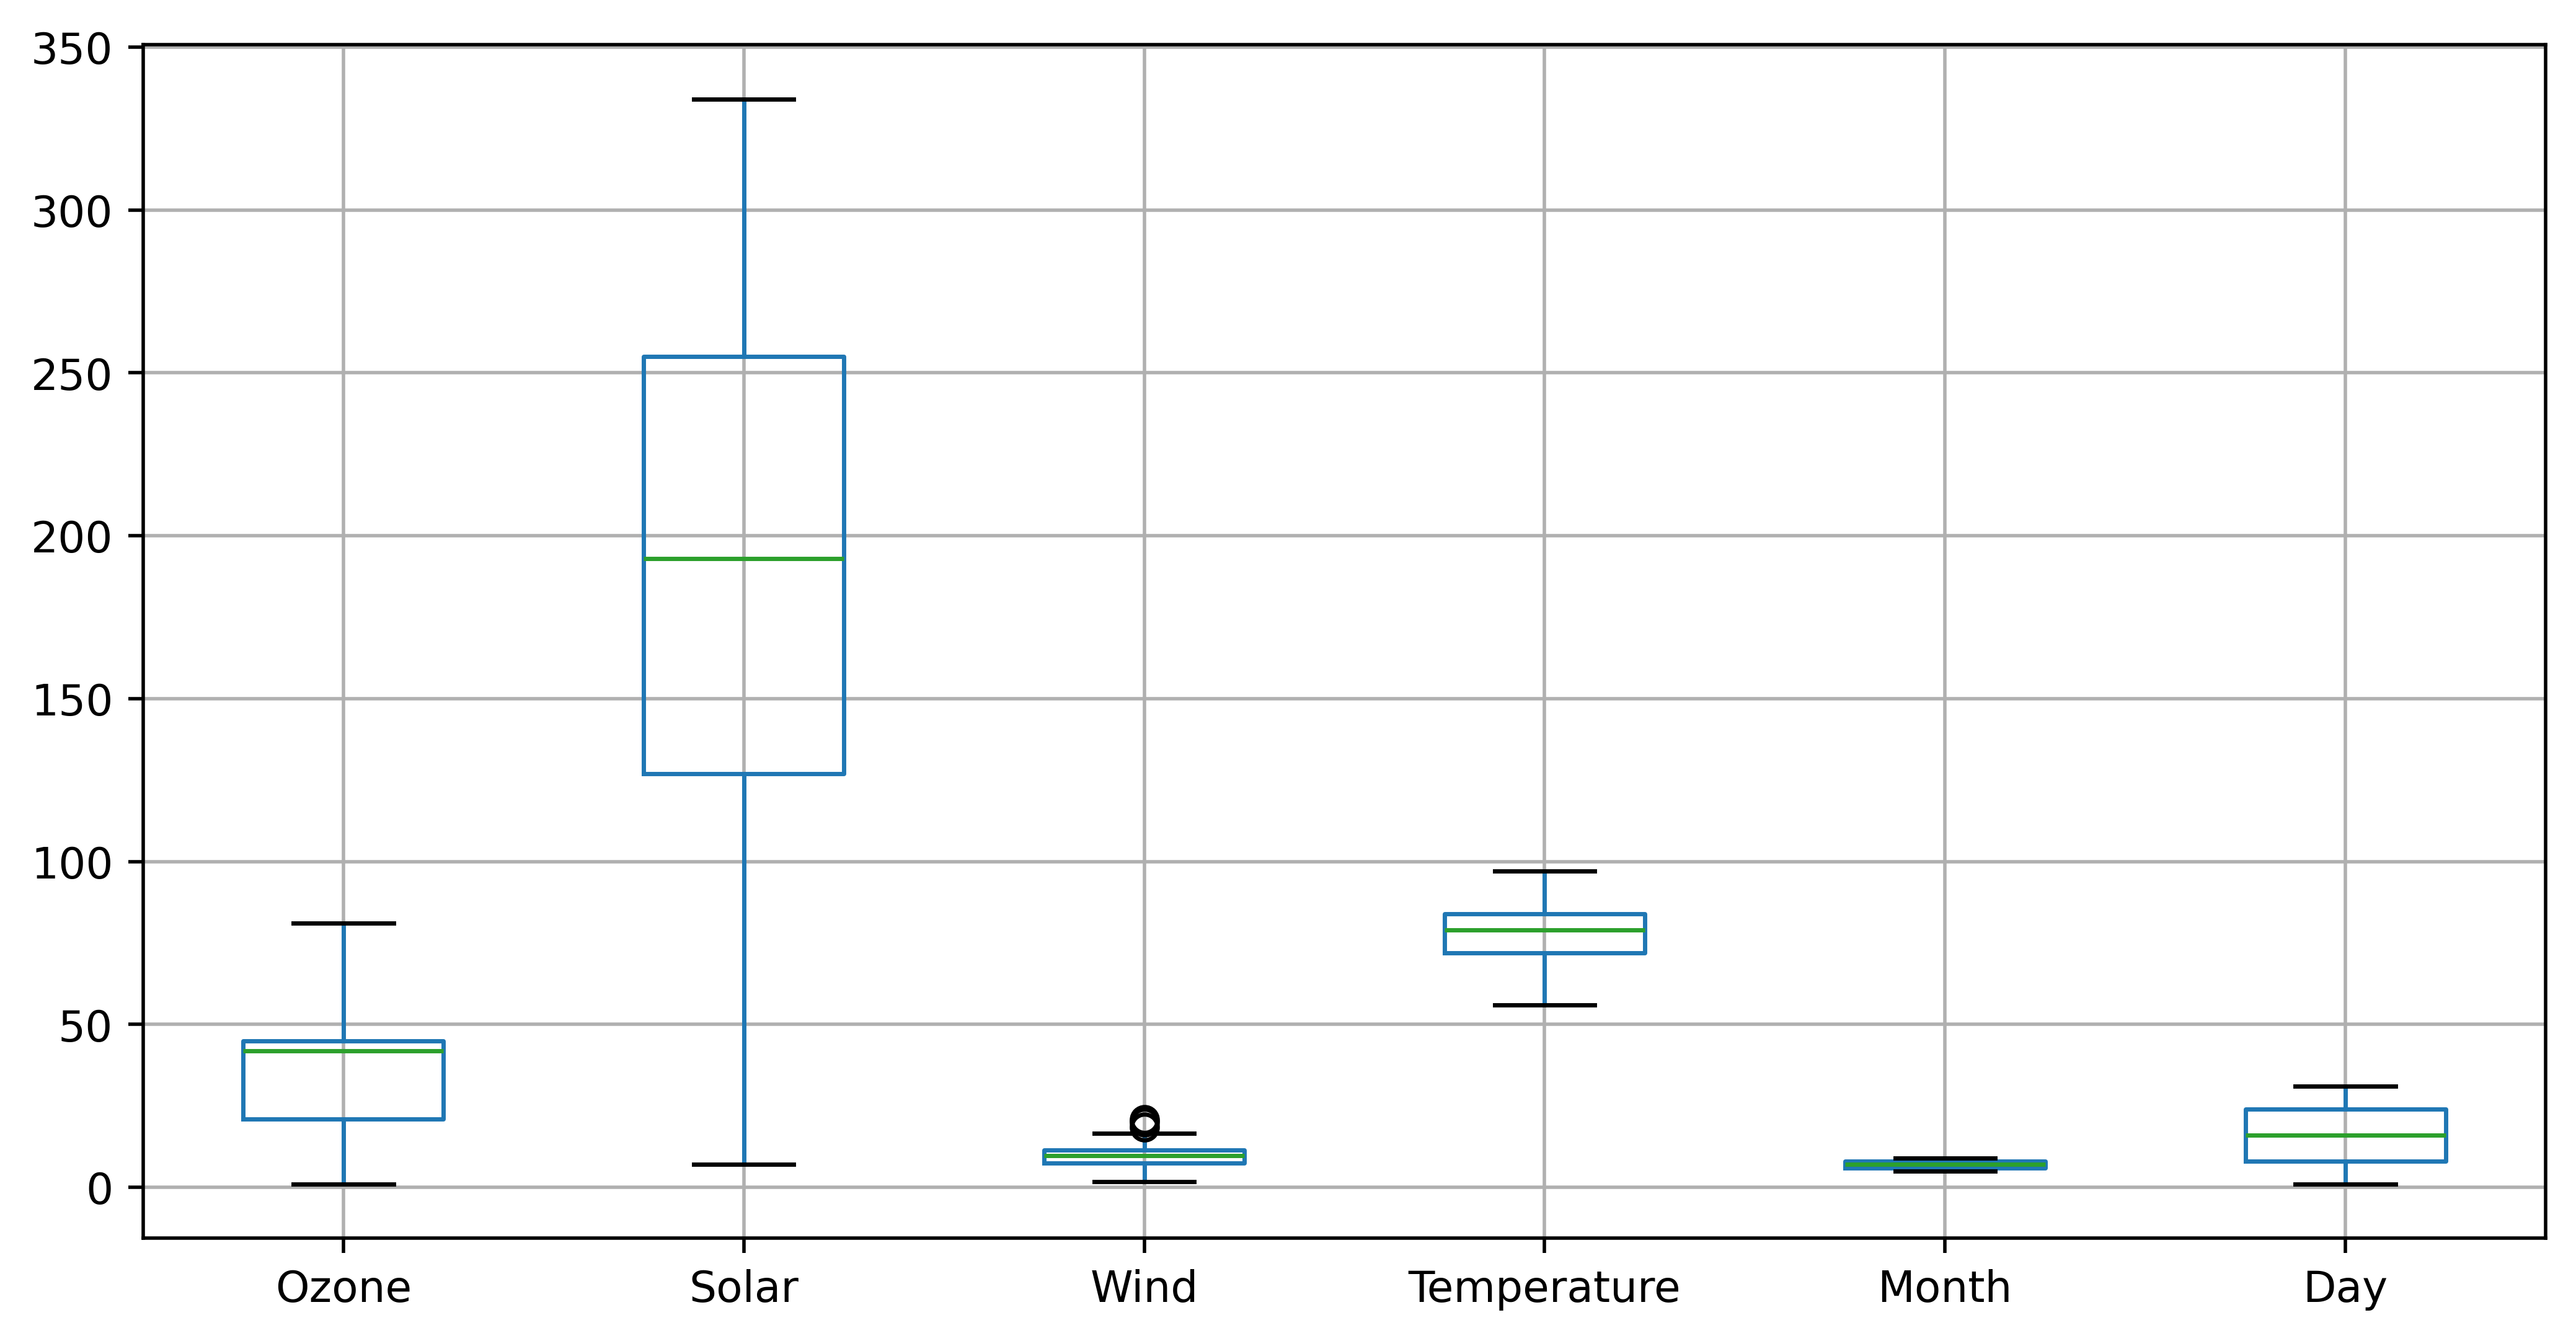

In [44]:
df.boxplot()
plt.show()

In [45]:
outlier_detection(df,"Wind")

(1.2500000000000009, 17.65)

In [46]:
df[df["Ozone"]>17.65]

,Ozone,Solar,Wind,Temperature,Month,Day,Weather
0,41.000000,190.000000,7.4,67.0,5,1,S
1,36.000000,118.000000,8.0,72.0,5,2,C
3,18.000000,313.000000,11.5,62.0,5,4,S
4,41.815126,185.366667,14.3,56.0,5,5,S
5,28.000000,185.366667,14.9,66.0,5,6,C
...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,68.0,9,30,S
153,41.000000,190.000000,7.4,67.0,5,1,C
154,30.000000,193.000000,6.9,70.0,9,26,PS
155,41.815126,145.000000,13.2,77.0,9,27,S


In [47]:
df.loc[df["Wind"]>17.65,"Wind"]=17.65

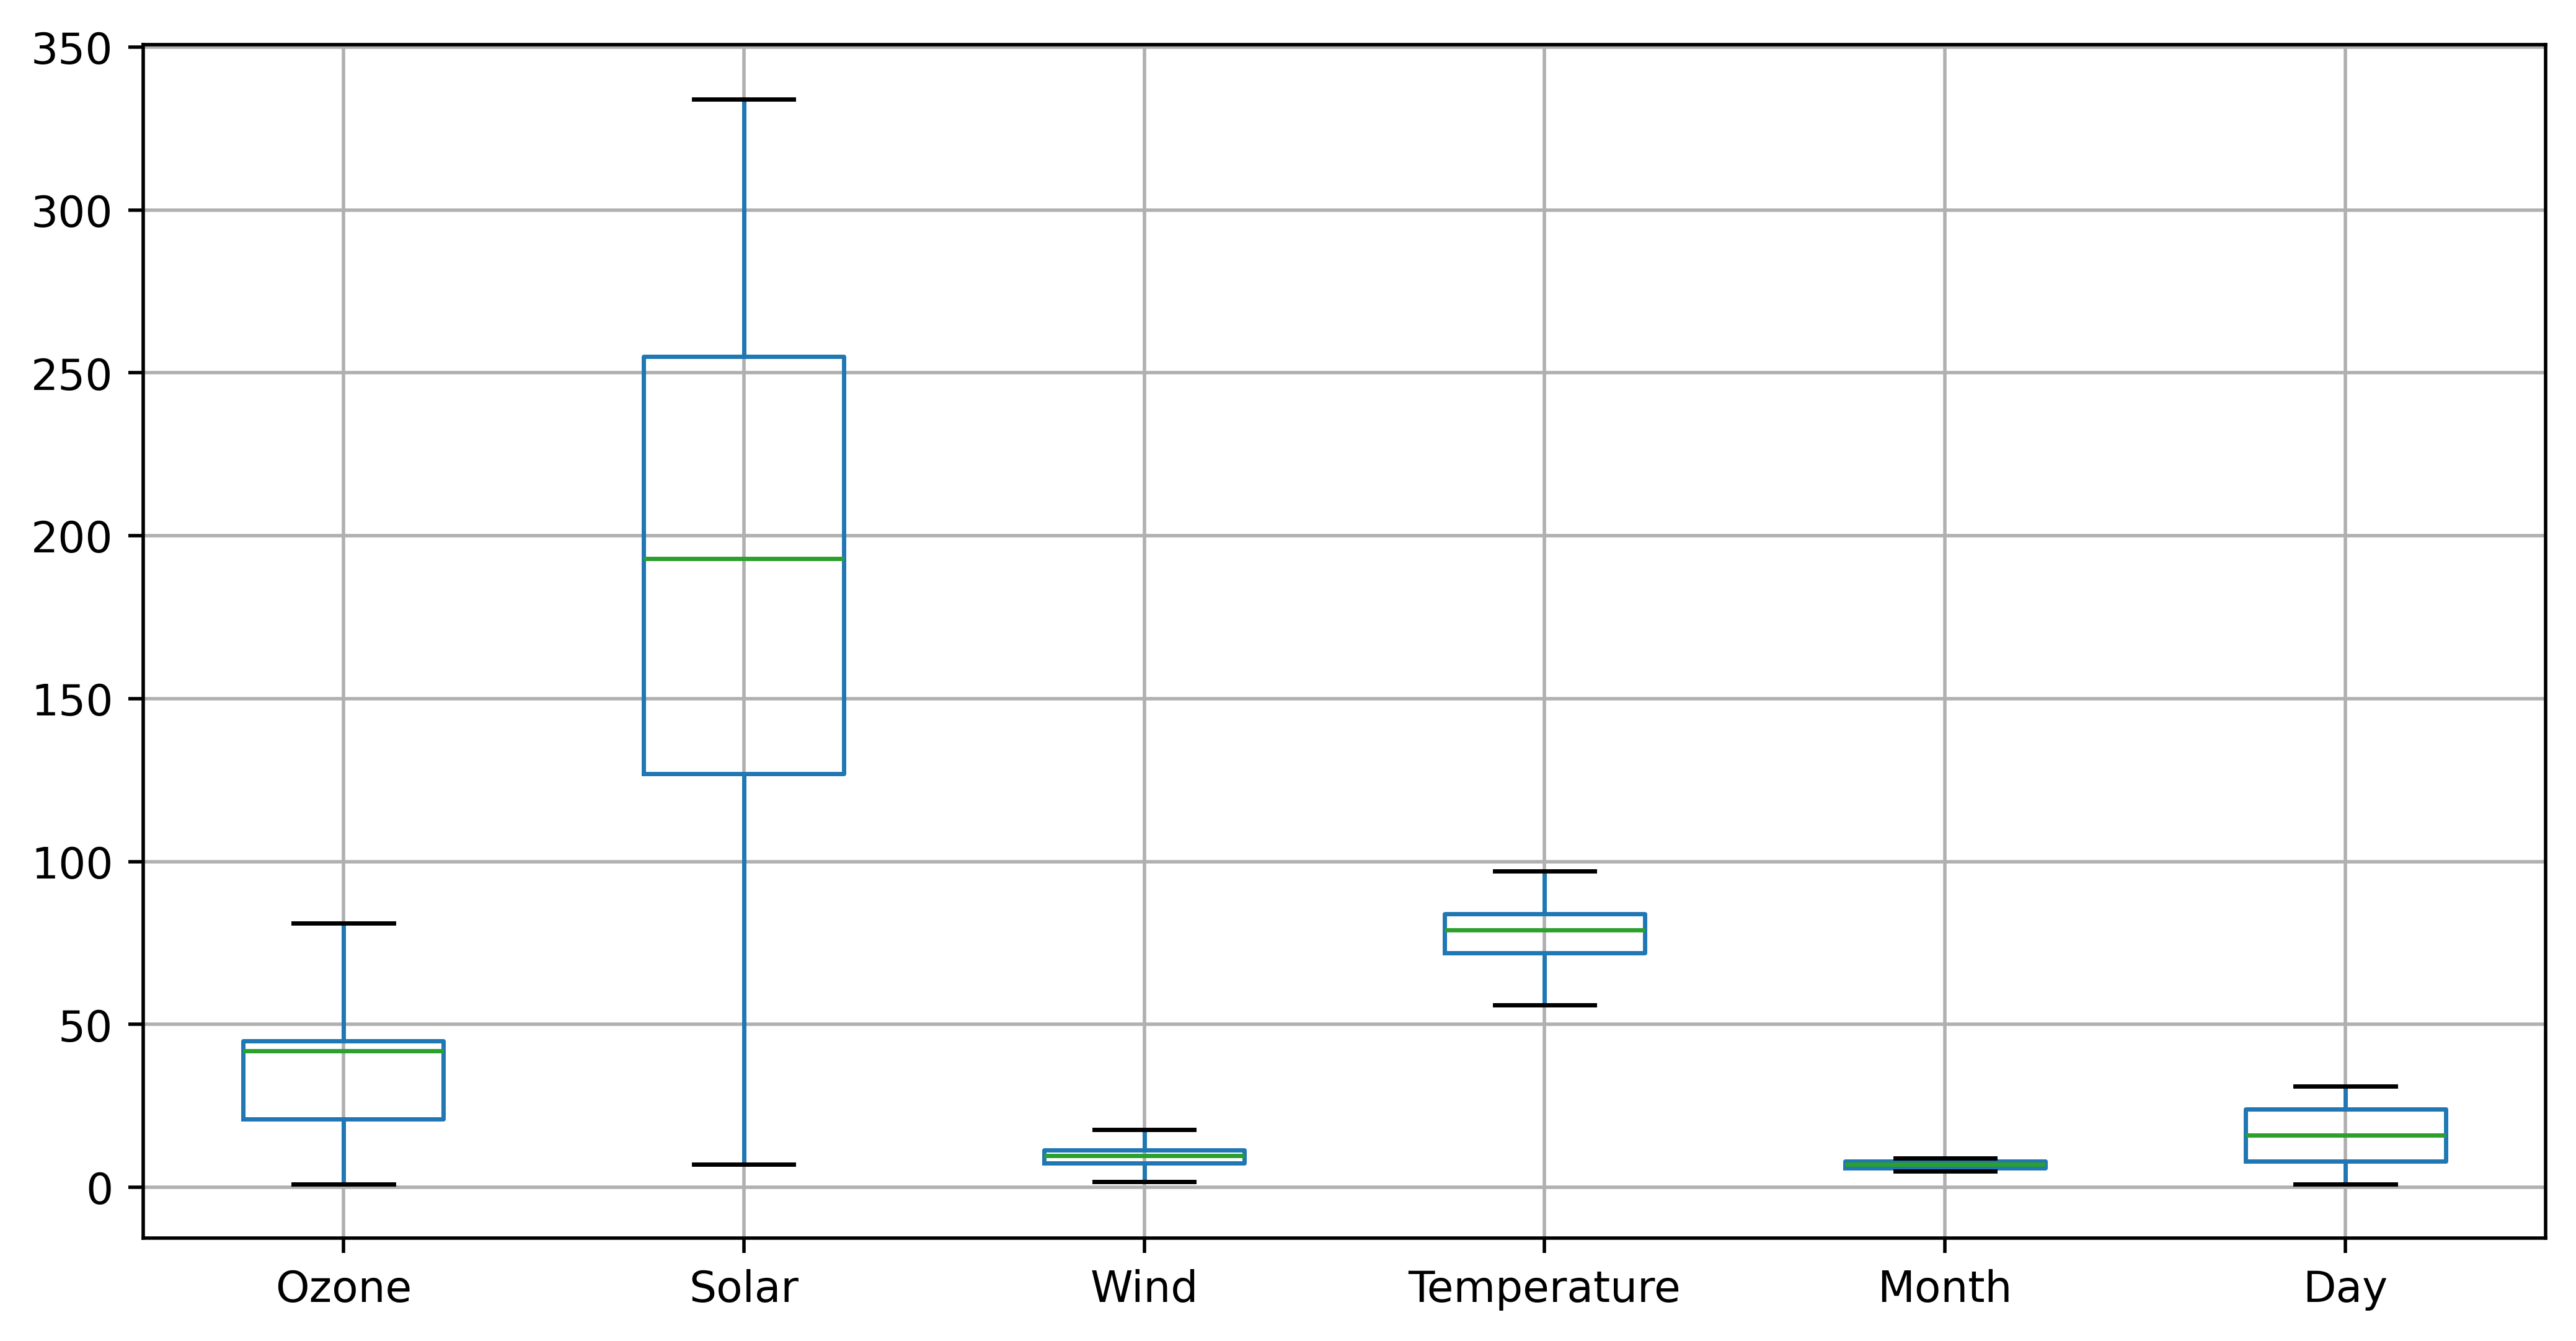

In [48]:
df.boxplot()
plt.show()

In [49]:
outlier_detection(df,"Month")

(3.0, 11.0)

In [50]:
df.loc[df["Month"]>11.0,"Month"]=11.0

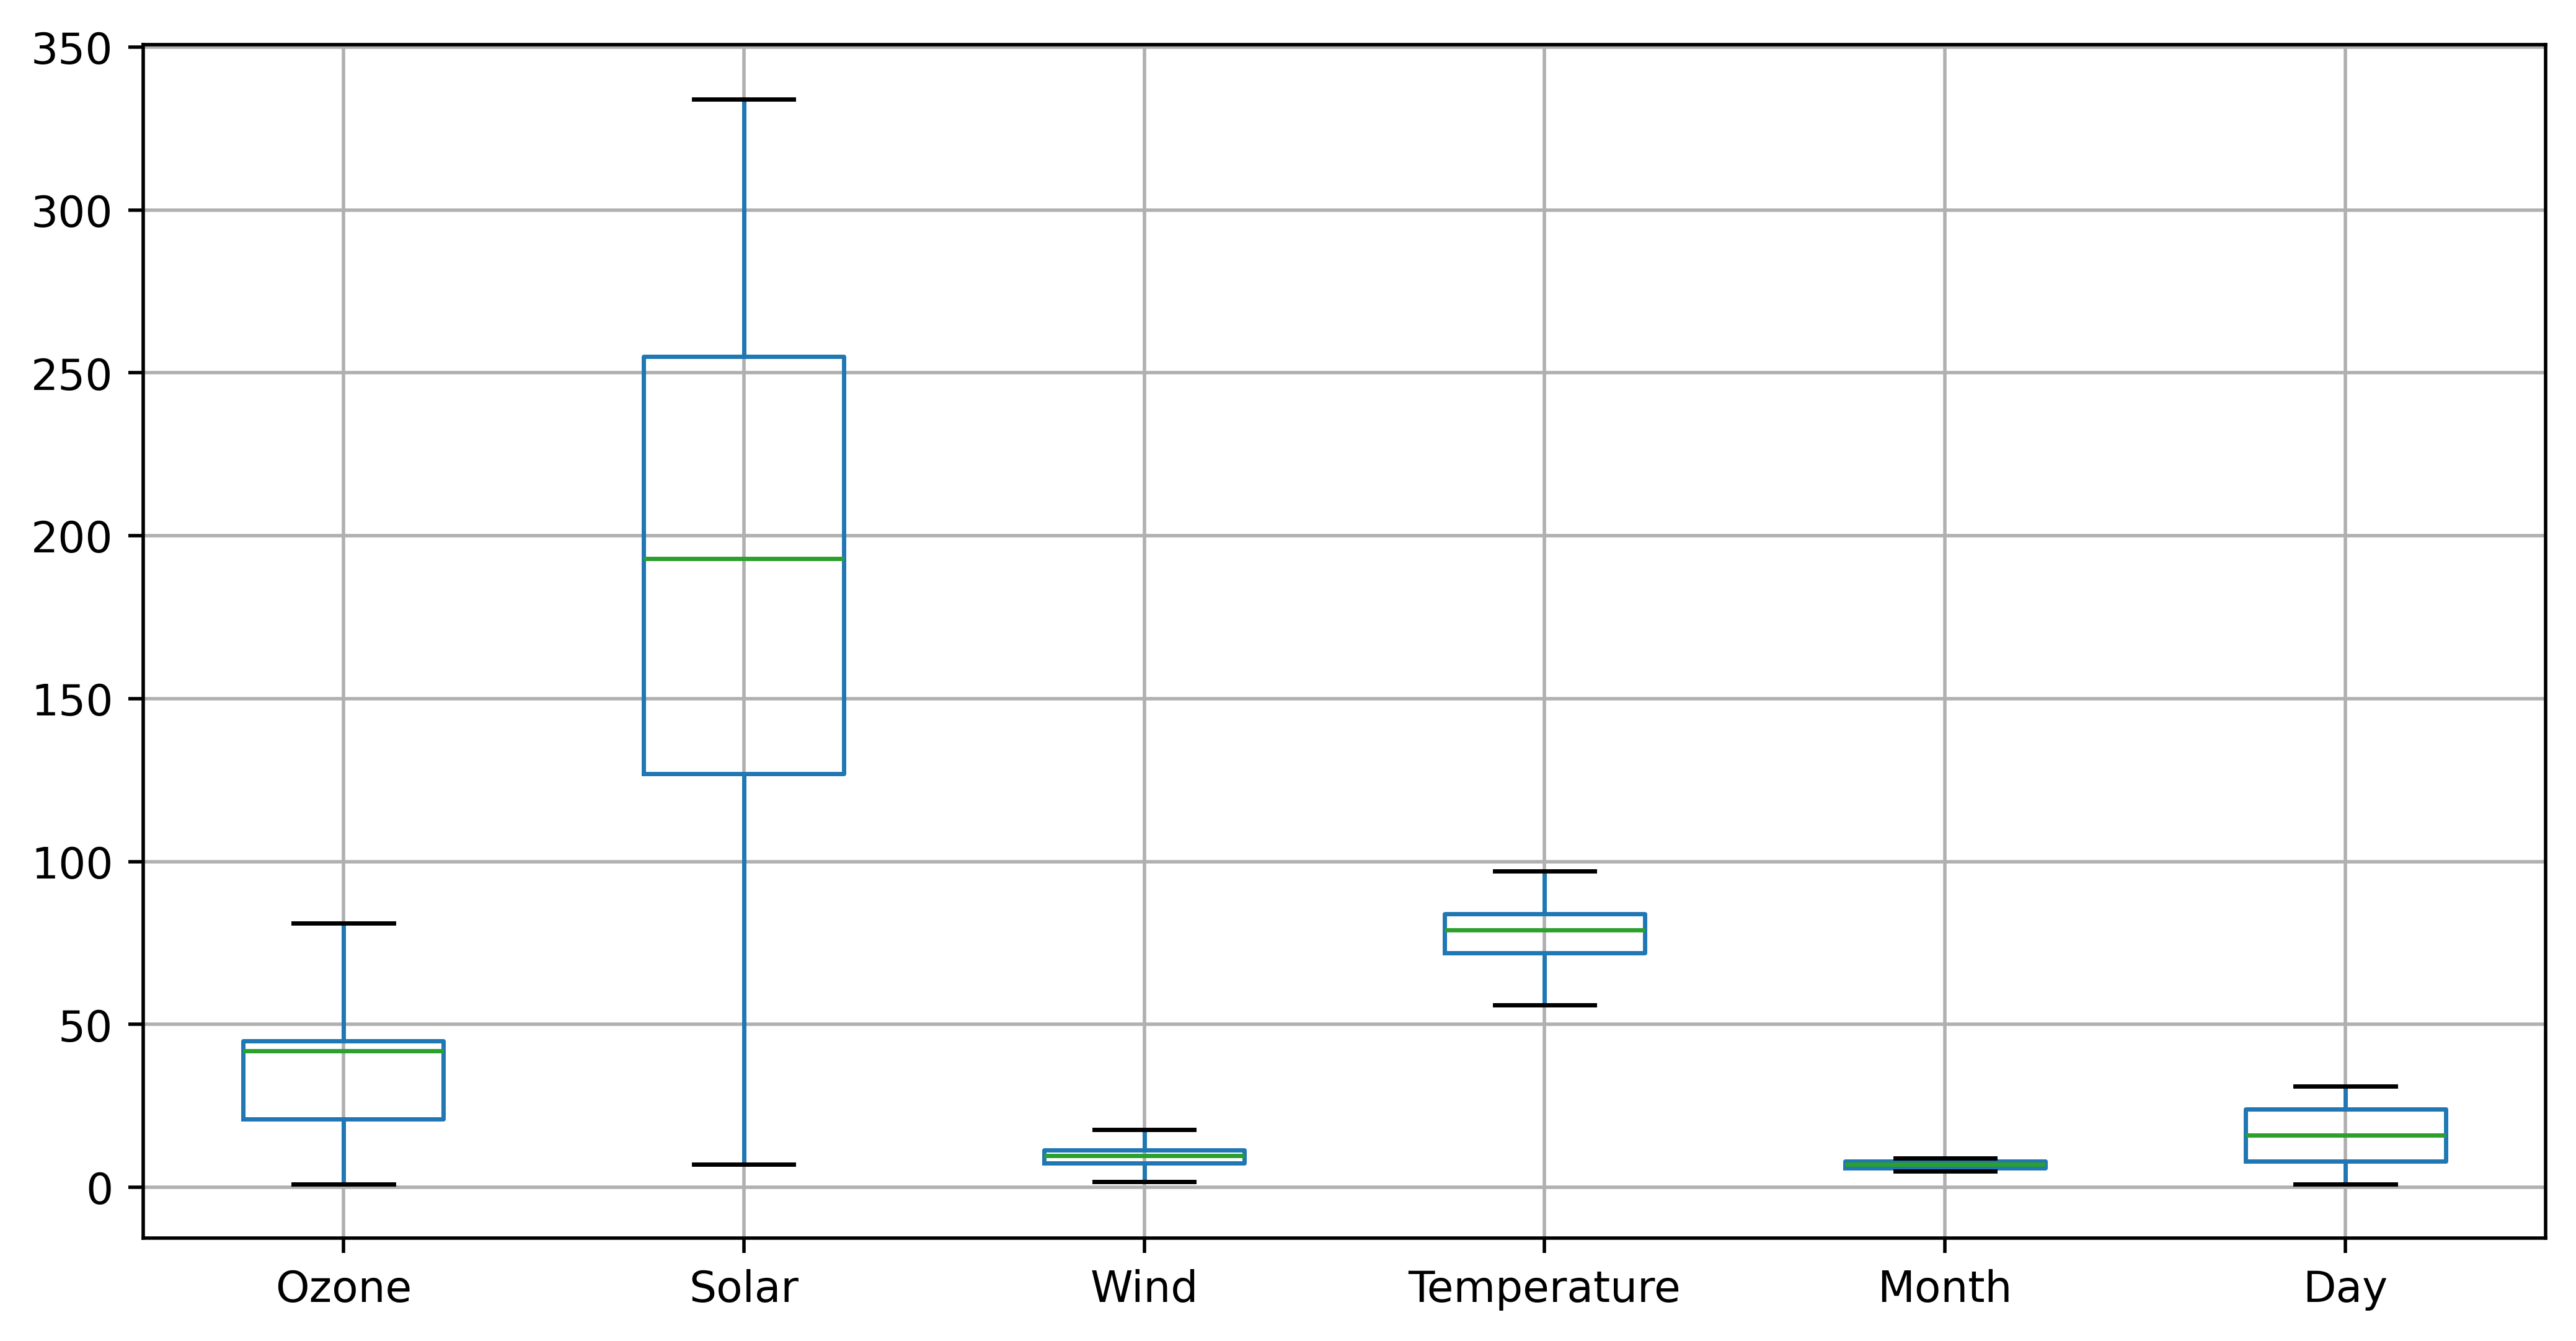

In [51]:
df.boxplot()
plt.show()

In [52]:
sns.pairplot(df)

In [53]:
plt.show()

In [54]:
numerical_df=df.select_dtypes(include=["number"])
correlation_matrix=numerical_df.corr()

In [126]:
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Correlation Heatmap')

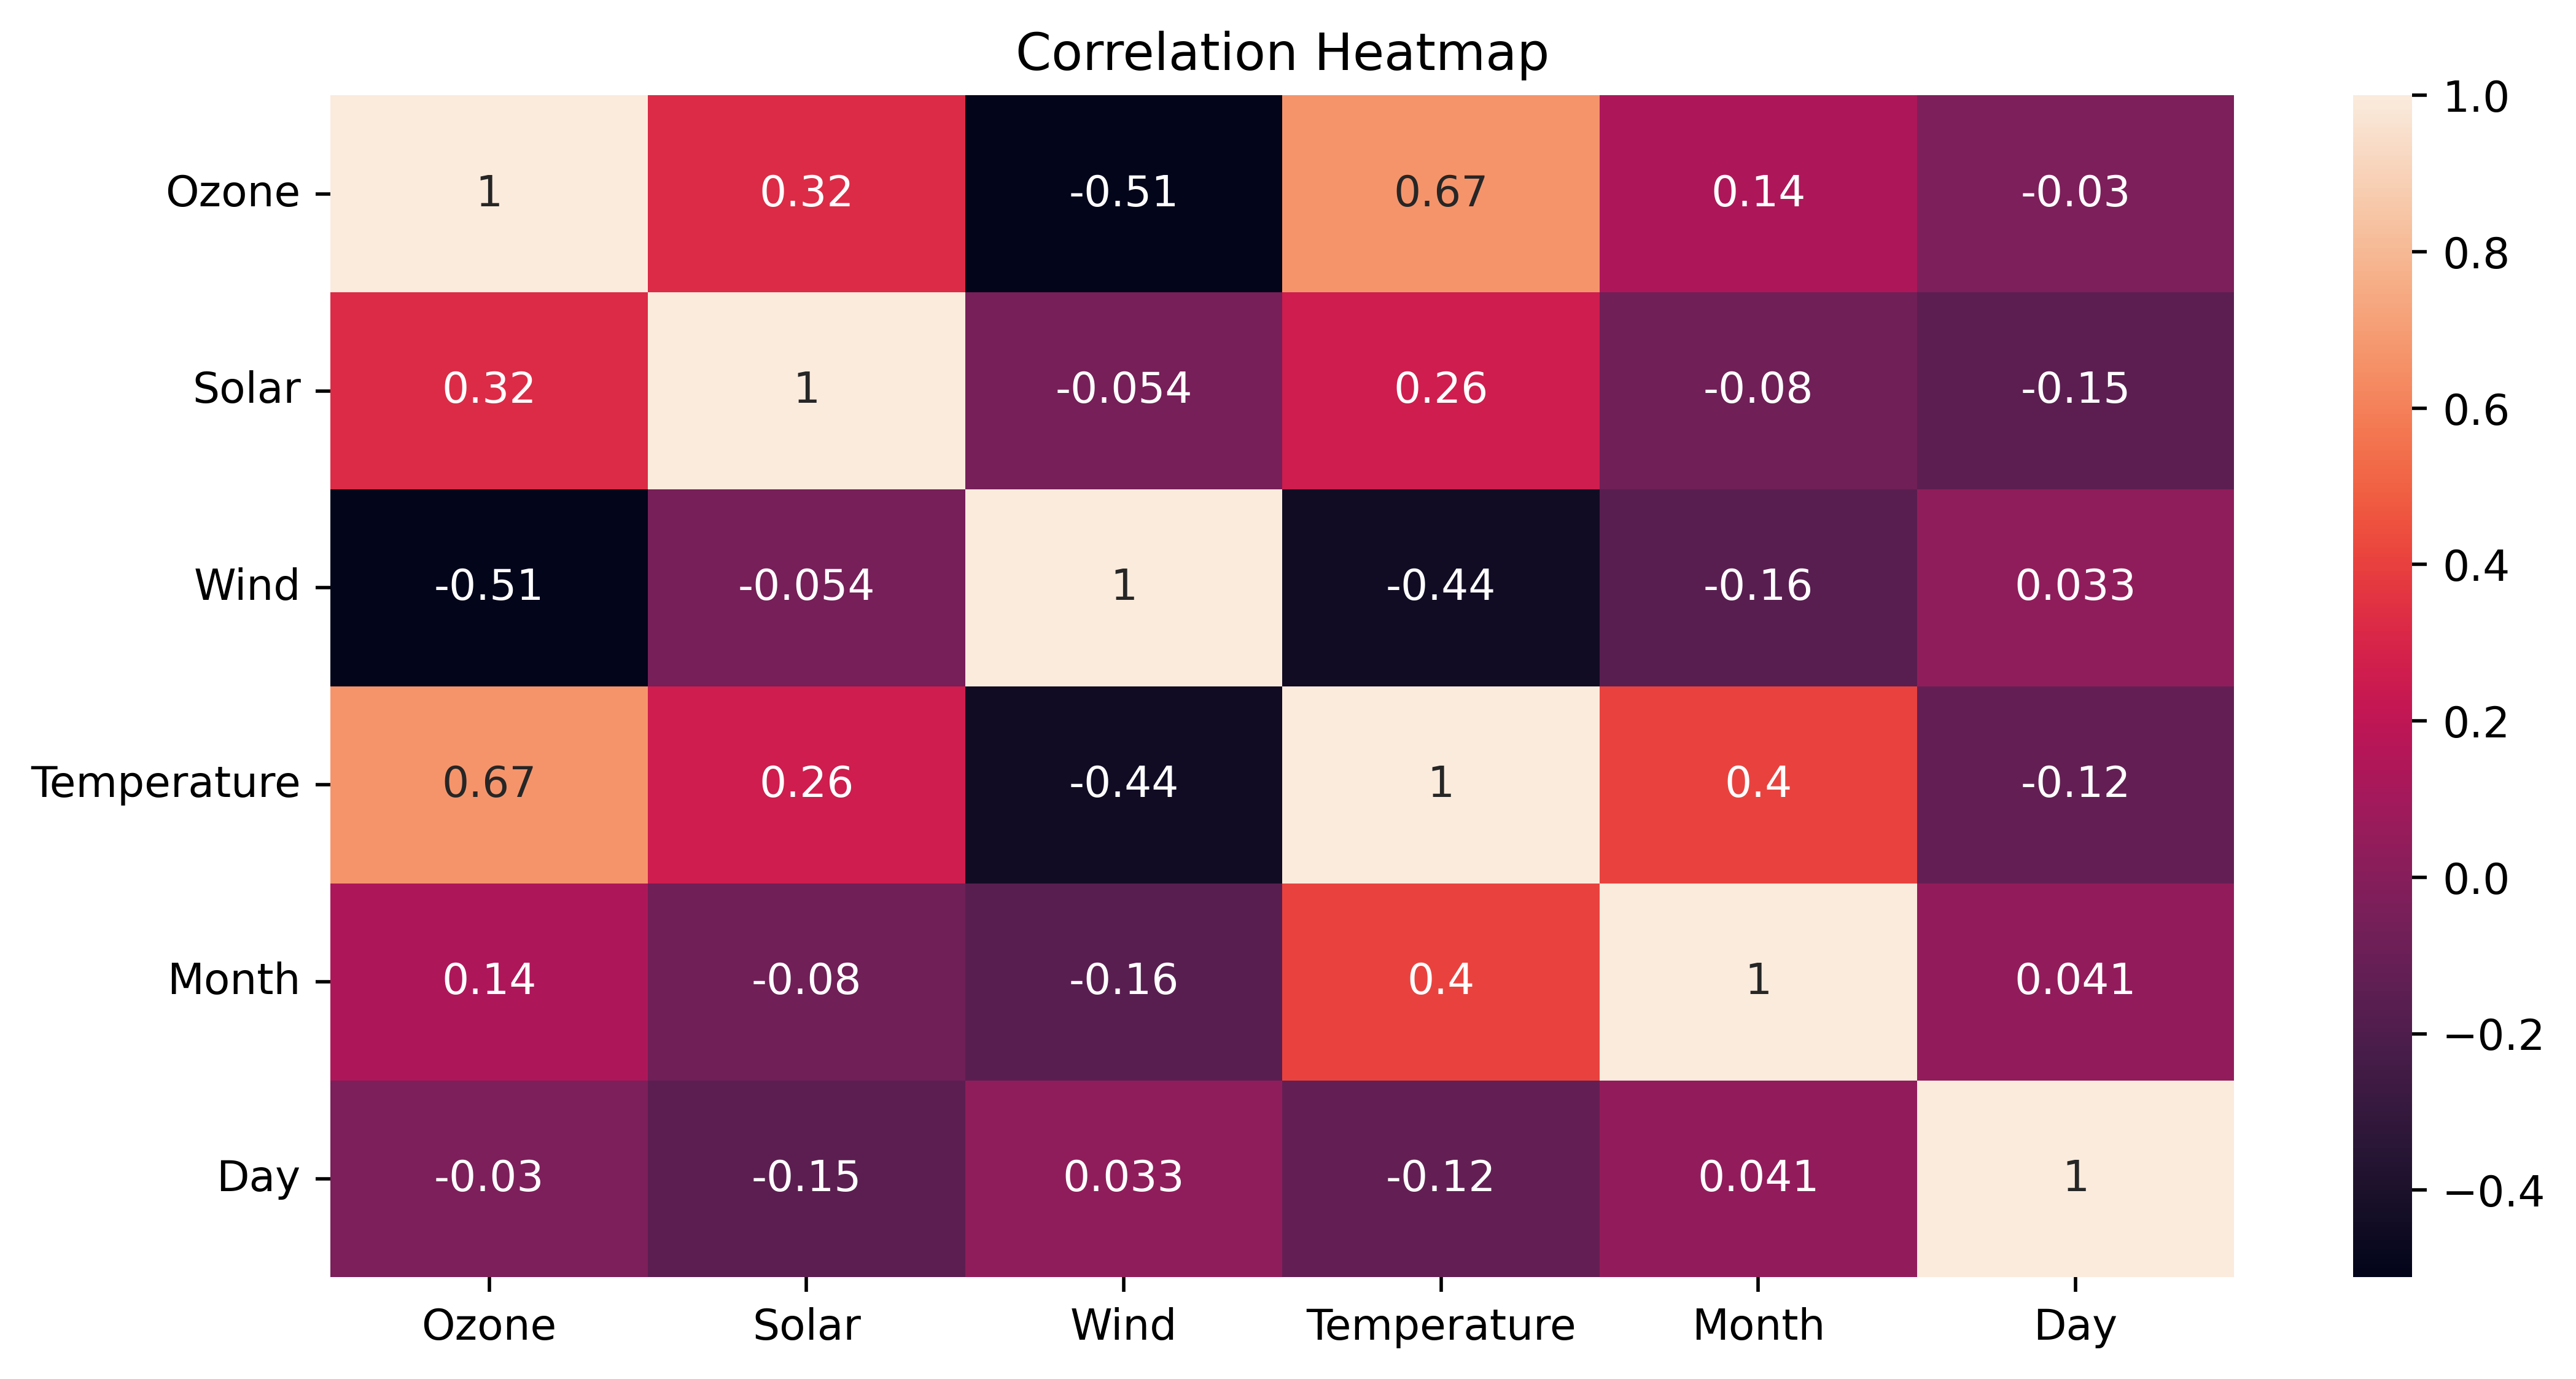

In [128]:
plt.show()

In [57]:
df

,Ozone,Solar,Wind,Temperature,Month,Day,Weather
0,41.000000,190.000000,7.4,67.0,5,1,S
1,36.000000,118.000000,8.0,72.0,5,2,C
2,12.000000,149.000000,12.6,74.0,5,3,PS
3,18.000000,313.000000,11.5,62.0,5,4,S
4,41.815126,185.366667,14.3,56.0,5,5,S
...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,68.0,9,30,S
153,41.000000,190.000000,7.4,67.0,5,1,C
154,30.000000,193.000000,6.9,70.0,9,26,PS
155,41.815126,145.000000,13.2,77.0,9,27,S


,Ozone,Solar,Wind,Temperature,Month,Day,Weather
0,41.000000,190.000000,7.4,67.0,5,1,S
1,36.000000,118.000000,8.0,72.0,5,2,C
2,12.000000,149.000000,12.6,74.0,5,3,PS
3,18.000000,313.000000,11.5,62.0,5,4,S
4,41.815126,185.366667,14.3,56.0,5,5,S
...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,68.0,9,30,S
153,41.000000,190.000000,7.4,67.0,5,1,C
154,30.000000,193.000000,6.9,70.0,9,26,PS
155,41.815126,145.000000,13.2,77.0,9,27,S


In [118]:
df

,Ozone,Solar,Wind,Temperature,Month,Day,Weather
0,41.000000,190.000000,7.4,67.0,5,1,S
1,36.000000,118.000000,8.0,72.0,5,2,C
2,12.000000,149.000000,12.6,74.0,5,3,PS
3,18.000000,313.000000,11.5,62.0,5,4,S
4,41.815126,185.366667,14.3,56.0,5,5,S
...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,68.0,9,30,S
153,41.000000,190.000000,7.4,67.0,5,1,C
154,30.000000,193.000000,6.9,70.0,9,26,PS
155,41.815126,145.000000,13.2,77.0,9,27,S


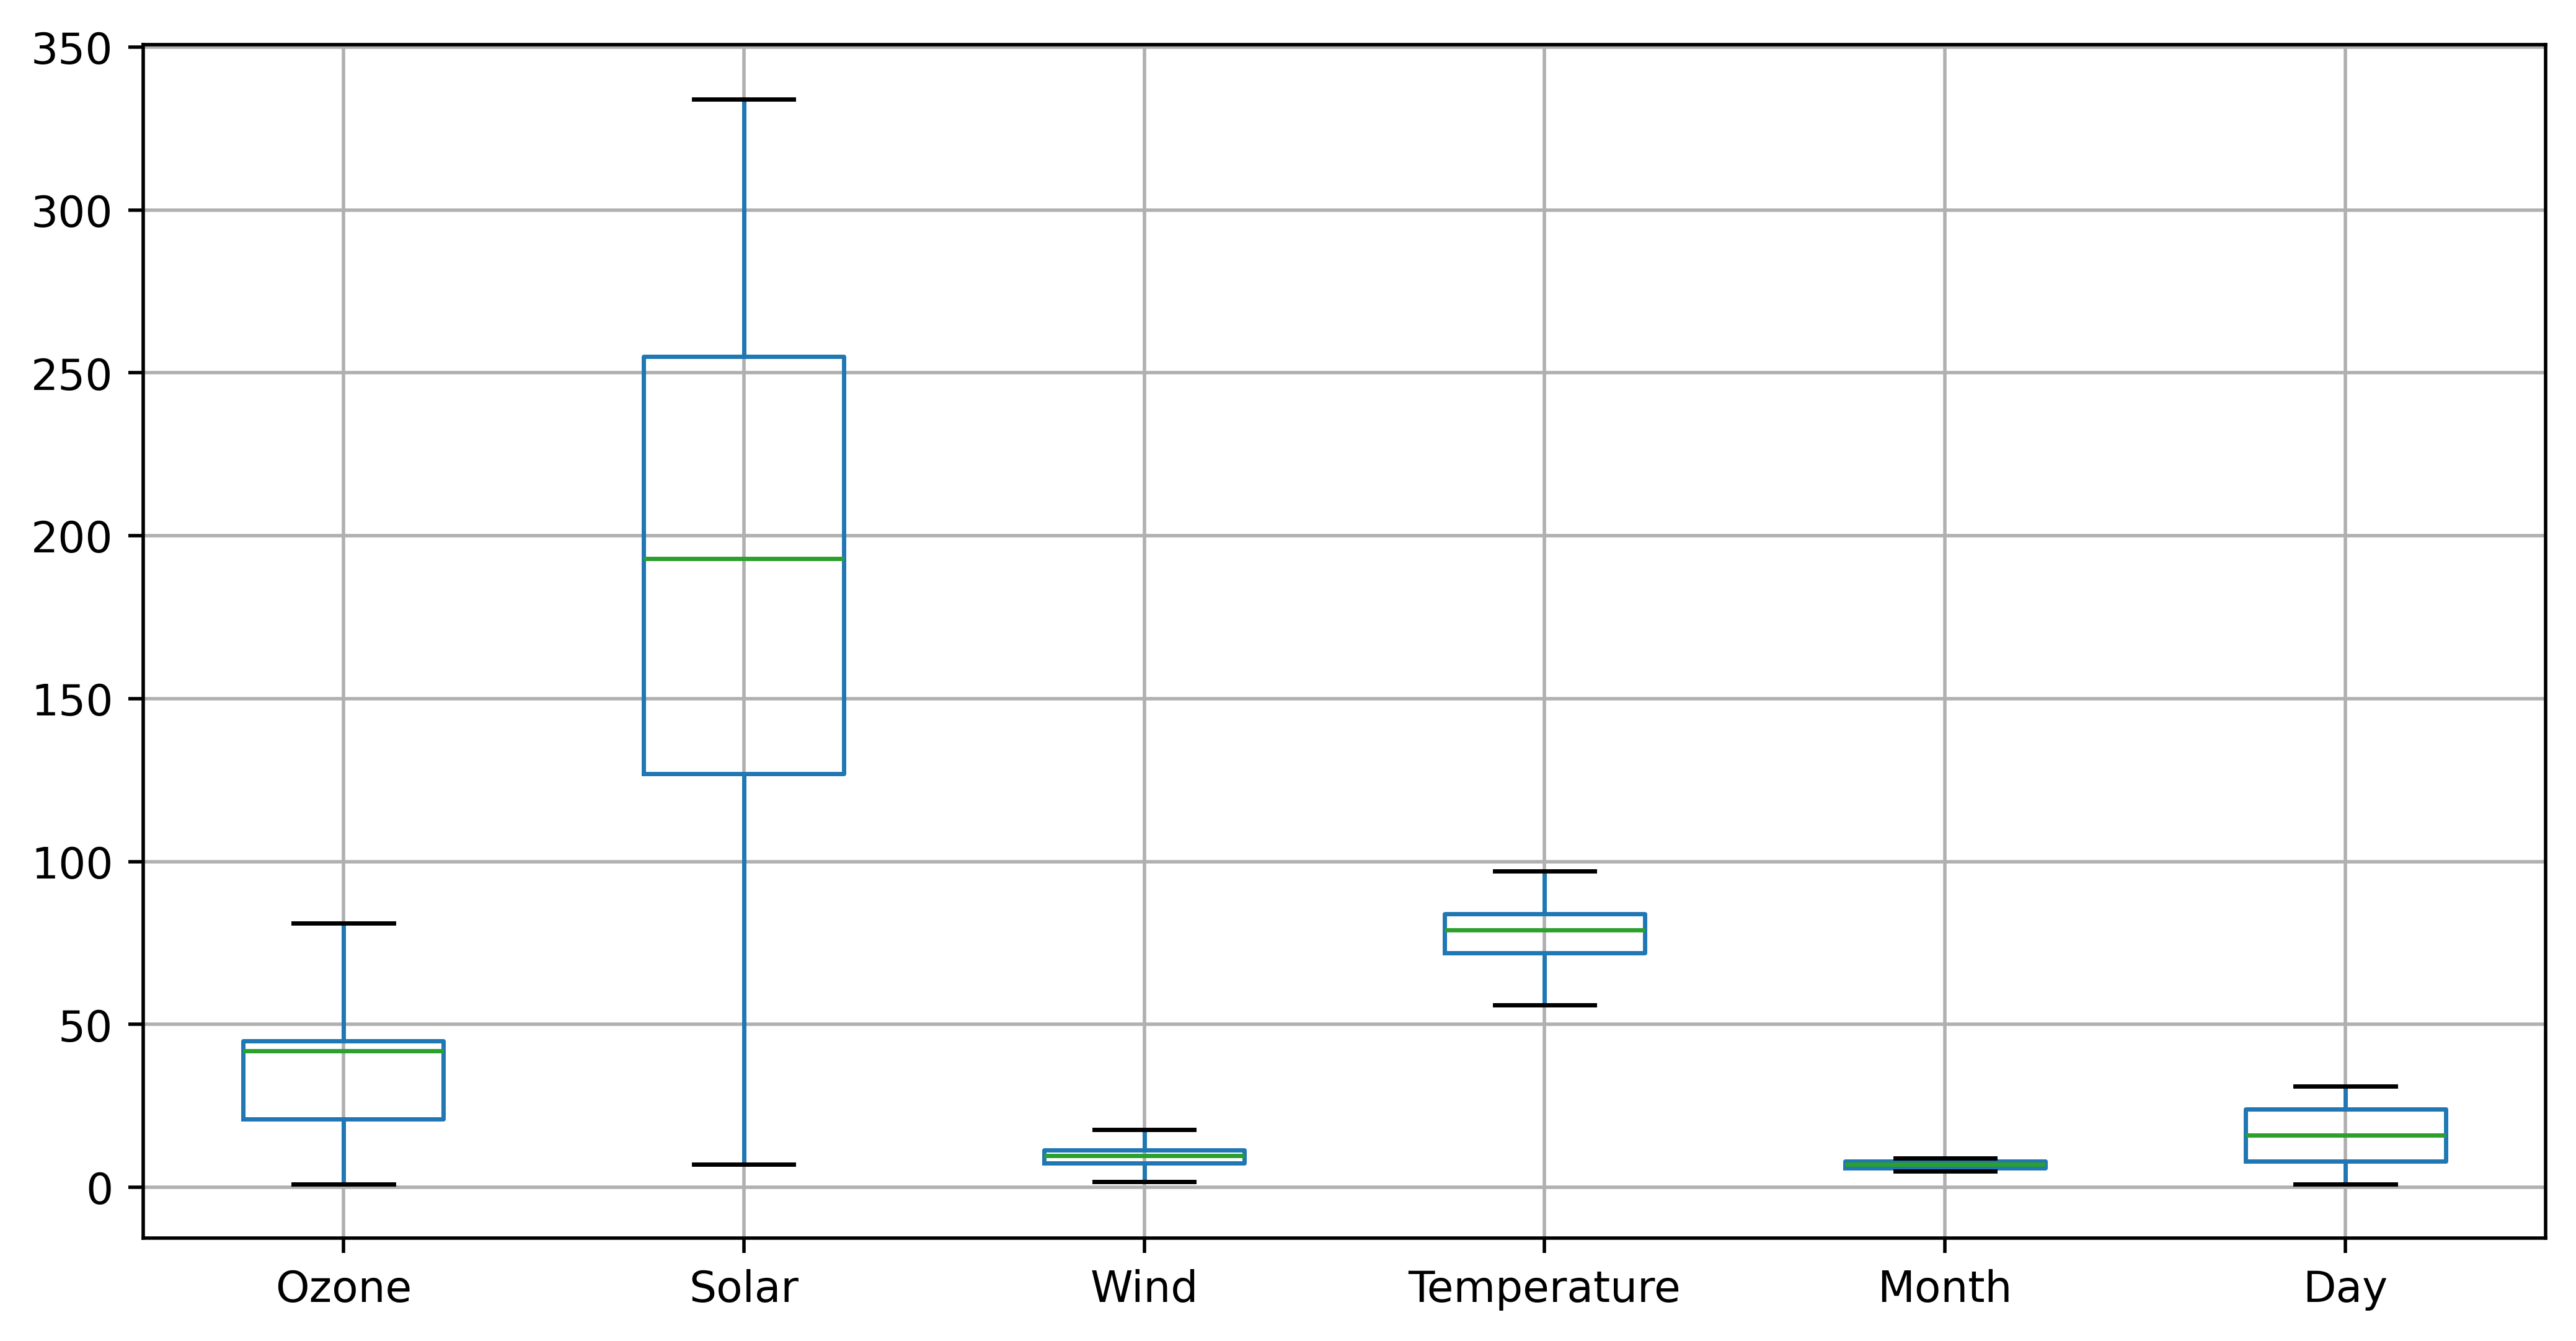

In [120]:
df.boxplot()
plt.show()

In [122]:
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Correlation Heatmap')

In [130]:
df=pd.get_dummies(data=df,columns=["Weather"],dtype=int)

In [132]:
df

,Ozone,Solar,Wind,Temperature,Month,Day,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,67.0,5,1,0,0,1
1,36.000000,118.000000,8.0,72.0,5,2,1,0,0
2,12.000000,149.000000,12.6,74.0,5,3,0,1,0
3,18.000000,313.000000,11.5,62.0,5,4,0,0,1
4,41.815126,185.366667,14.3,56.0,5,5,0,0,1
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,68.0,9,30,0,0,1
153,41.000000,190.000000,7.4,67.0,5,1,1,0,0
154,30.000000,193.000000,6.9,70.0,9,26,0,1,0
155,41.815126,145.000000,13.2,77.0,9,27,0,0,1


### feature scalling

In [145]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [147]:
sc=StandardScaler()
sc.fit_transform(df)

array([[ 0.07399096,  0.05342774, -0.73459309, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.15111457, -0.7768163 , -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-1.23162109, -0.41935011,  0.79941842, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.4212412 ,  0.08802124, -0.8820942 , ..., -0.67357531,
         1.52984494, -0.79713027],
       [ 0.11068883, -0.46547478,  0.97641975, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.96149446, -0.62691113, -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [149]:
scalled_data=pd.DataFrame(sc.fit_transform(df))

In [151]:
scalled_data

,0,1,2,3,4,5,6,7,8
0,0.073991,0.053428,-0.734593,-1.149265,-1.412198,-1.668937,-0.673575,-0.653661,1.25450
1,-0.151115,-0.776816,-0.557592,-0.615678,-1.412198,-1.557152,1.484615,-0.653661,-0.79713
2,-1.231621,-0.419350,0.799418,-0.402243,-1.412198,-1.445367,-0.673575,1.529845,-0.79713
3,-0.961494,1.471761,0.474916,-1.682852,-1.412198,-1.333583,-0.673575,-0.653661,1.25450
4,0.110689,0.000000,1.300922,-2.323157,-1.412198,-1.221798,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.871452,0.433956,0.474916,-1.042548,1.385469,1.572816,-0.673575,-0.653661,1.25450
153,0.073991,0.053428,-0.734593,-1.149265,-1.412198,-1.668937,1.484615,-0.653661,-0.79713
154,-0.421241,0.088021,-0.882094,-0.829113,1.385469,1.125678,-0.673575,1.529845,-0.79713
155,0.110689,-0.465475,0.976420,-0.082090,1.385469,1.237462,-0.673575,-0.653661,1.25450


In [159]:
scalled_data=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [161]:
scalled_data.describe()

,Ozone,Solar,Wind,Temperature,Month,Day,Weather_C,Weather_PS,Weather_S
count,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,3.394312e-17,-9.051500e-17,1.470869e-16,-4.073175e-16,1.810300e-16,-2.262875e-17,4.242891e-17,-8.485781e-18,-7.849347e-17
std,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00
min,-1.726853e+00,-2.056776e+00,-2.416106e+00,-2.323157e+00,-1.412198e+00,-1.668937e+00,-6.735753e-01,-6.536610e-01,-7.971303e-01
25%,-8.264311e-01,-6.730358e-01,-7.345931e-01,-6.156777e-01,-7.127815e-01,-8.864446e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
50%,1.106888e-01,8.802124e-02,-5.608800e-02,1.313446e-01,-1.336465e-02,7.832041e-03,-6.735753e-01,-6.536610e-01,-7.971303e-01
75%,2.540754e-01,8.029536e-01,4.749160e-01,6.649320e-01,6.860522e-01,9.021087e-01,1.484615e+00,1.529845e+00,1.254500e+00
max,1.874835e+00,1.713916e+00,2.289180e+00,2.052259e+00,1.385469e+00,1.684601e+00,1.484615e+00,1.529845e+00,1.254500e+00


In [163]:
mn=MinMaxScaler()
minmax_scaled=pd.DataFrame(mn.fit_transform(df),columns=df.columns)

In [165]:
minmax_scaled

,Ozone,Solar,Wind,Temperature,Month,Day,Weather_C,Weather_PS,Weather_S
0,0.500000,0.559633,0.357367,0.268293,0.0,0.000000,0.0,0.0,1.0
1,0.437500,0.339450,0.394984,0.390244,0.0,0.033333,1.0,0.0,0.0
2,0.137500,0.434251,0.683386,0.439024,0.0,0.066667,0.0,1.0,0.0
3,0.212500,0.935780,0.614420,0.146341,0.0,0.100000,0.0,0.0,1.0
4,0.510189,0.545464,0.789969,0.000000,0.0,0.133333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
152,0.237500,0.660550,0.614420,0.292683,1.0,0.966667,0.0,0.0,1.0
153,0.500000,0.559633,0.357367,0.268293,0.0,0.000000,1.0,0.0,0.0
154,0.362500,0.568807,0.326019,0.341463,1.0,0.833333,0.0,1.0,0.0
155,0.510189,0.422018,0.721003,0.512195,1.0,0.866667,0.0,0.0,1.0


In [167]:
sns.countplot(df)

<Axes: ylabel='count'>

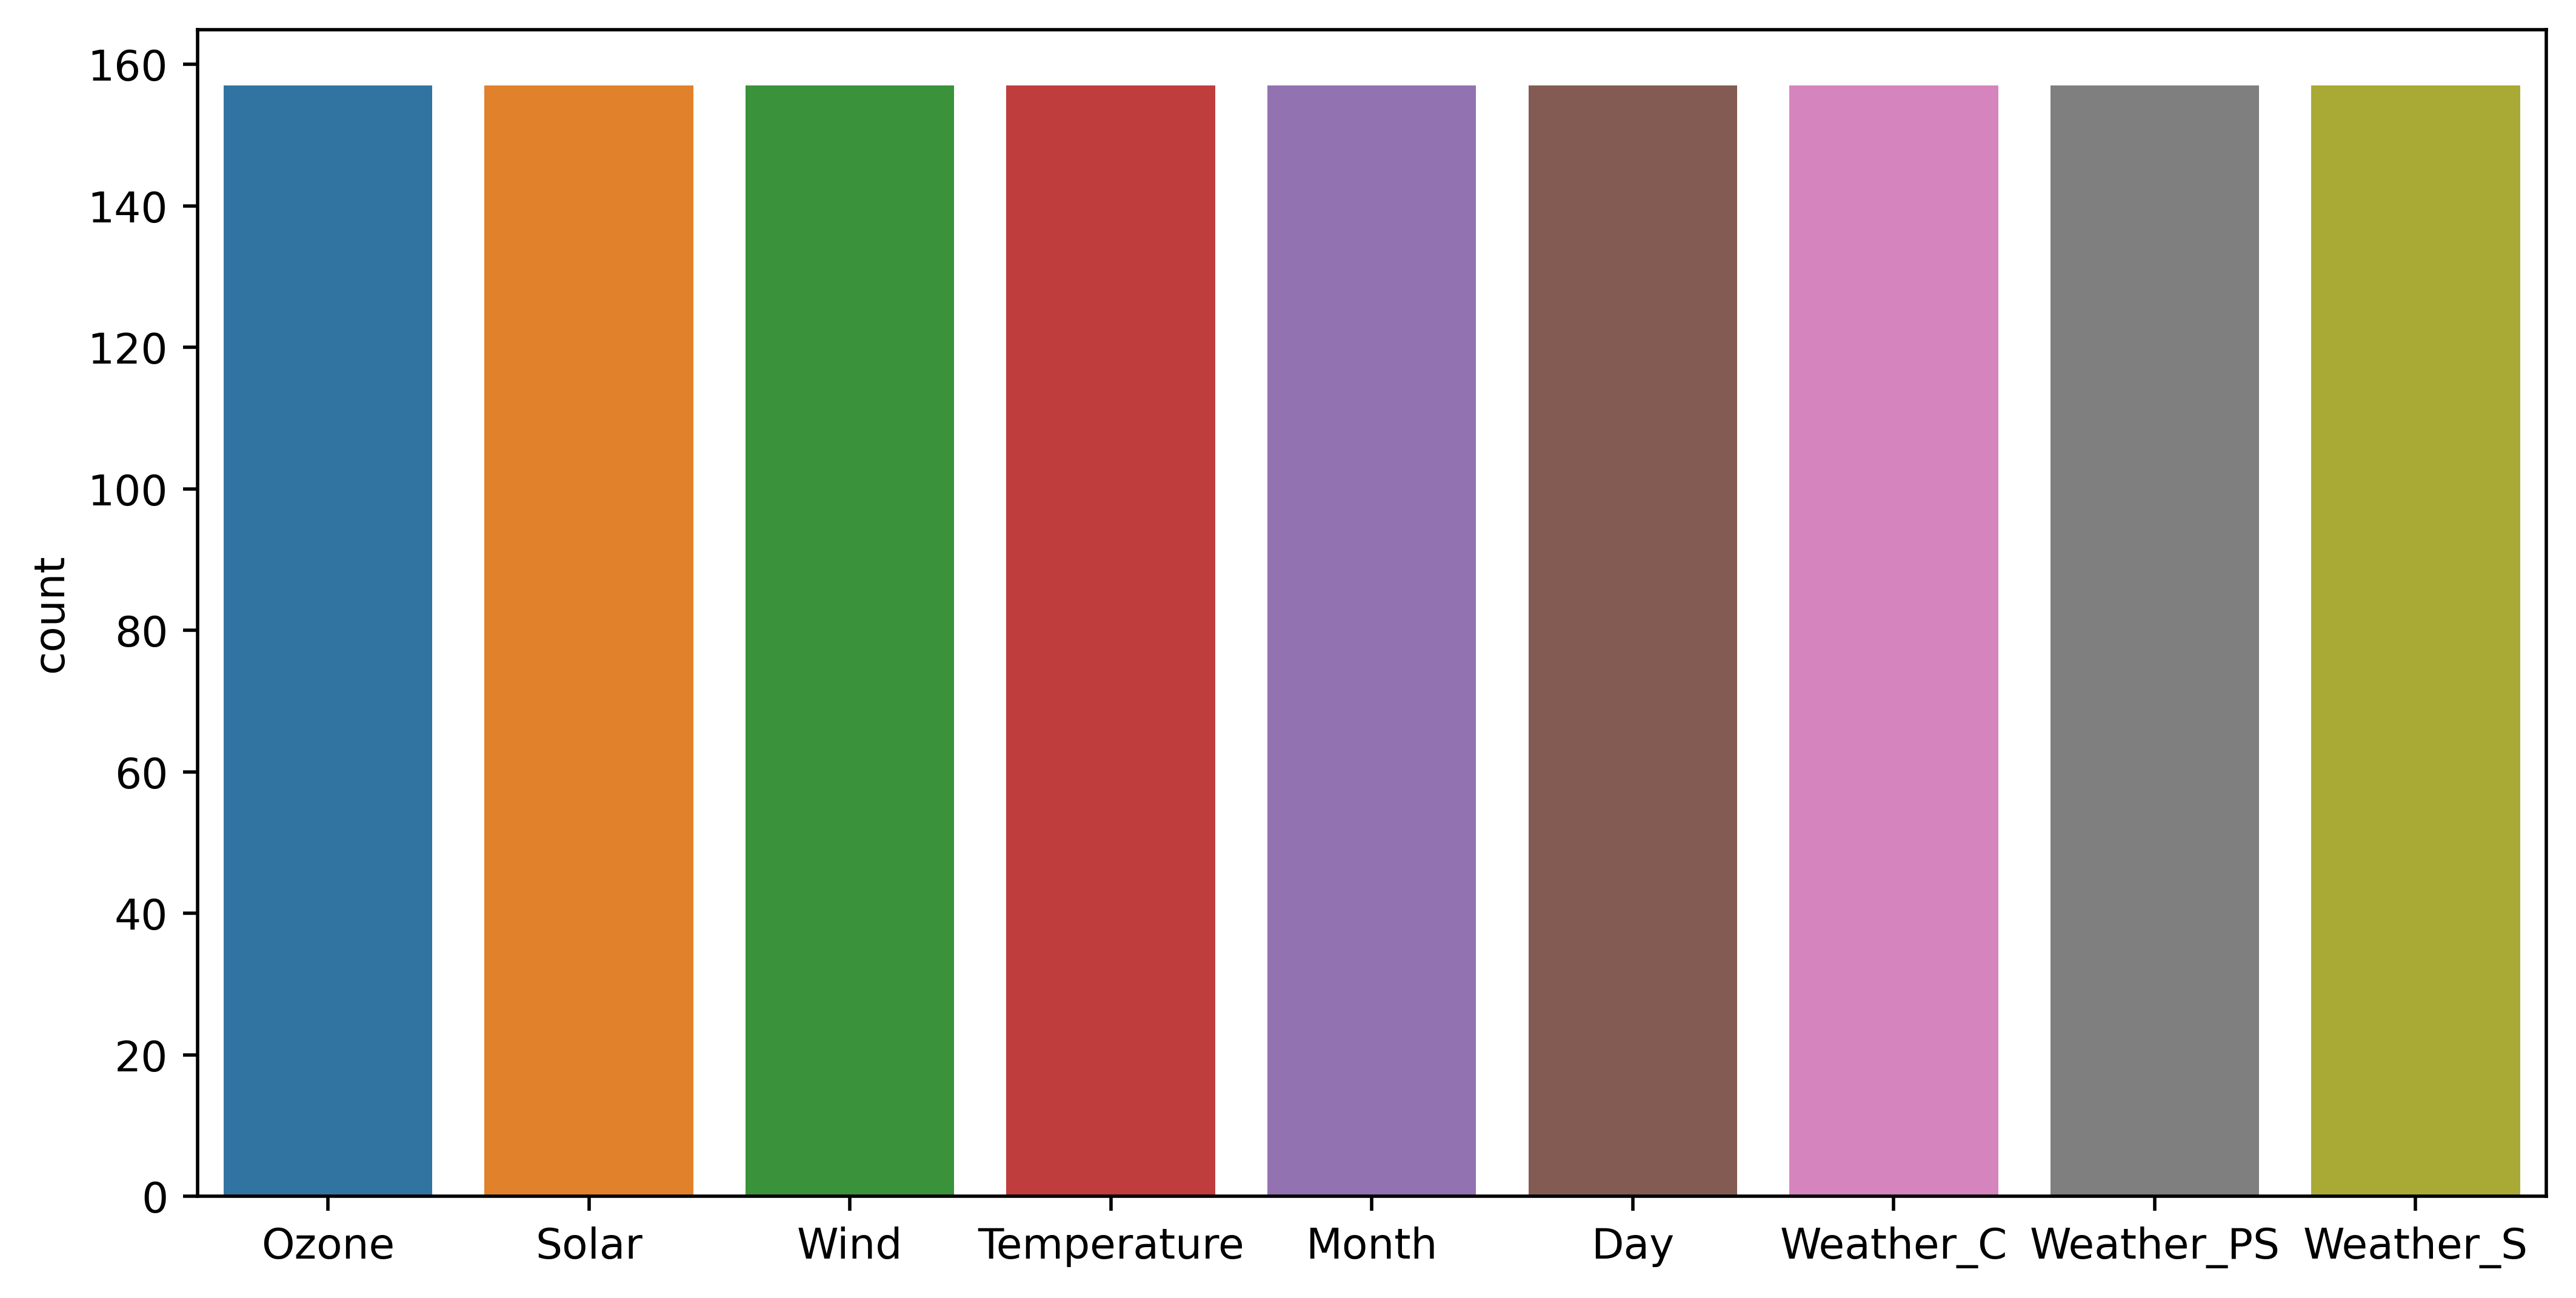

In [169]:
plt.show()